# Importing Libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading and combining datasets:

In [ ]:
import pandas as pd

# Loading the datasets
weather_df = pd.read_csv('/content/after modifying datetime.csv')
aqi_df = pd.read_csv('/content/aqi_data_complete_with_gaps.csv')

# Displaying basic info about each dataset
print("Weather Data Shape:", weather_df.shape)
print("\nWeather Data Columns:")
for col in weather_df.columns:
    print(col)

print("\n" + "="*50 + "\n")
print("AQI Data Shape:", aqi_df.shape)
print("\nAQI Data Columns:")
for col in aqi_df.columns:
    print(col)


# Merging the datasets
combined_df = pd.merge(
    weather_df,
    aqi_df,
    left_on='datetime',
    right_on='datetime_pkt',
    how='inner'
)

# Dropping unnecessary columns
combined_df = combined_df.drop('datetime_pkt', axis=1)
combined_df = combined_df.drop('datetime_utc', axis=1)
combined_df = combined_df.drop('timestamp', axis=1)


# Displaying merged data info
print("\n" + "="*50 + "\n")
print("Combined Data Shape:", combined_df.shape)
print("\nCombined Data Columns:")
for col in combined_df.columns:
    print(col)
print("\n" + "="*50 + "\n")
print("\nFirst few rows of Combined Data:")
print(combined_df.head())


Weather Data Shape: (27120, 9)

Weather Data Columns:
datetime
temperature_2m (°C)
relative_humidity_2m (%)
precipitation (mm)
surface_pressure (hPa)
cloud_cover (%)
wind_speed_10m (m/s)
wind_direction_10m (°)
shortwave_radiation (W/m²)


AQI Data Shape: (27120, 13)

AQI Data Columns:
datetime_pkt
datetime_utc
timestamp
is_gap
aqi
co
no
no2
o3
so2
pm2_5
pm10
nh3


Combined Data Shape: (27120, 19)

Combined Data Columns:
datetime
temperature_2m (°C)
relative_humidity_2m (%)
precipitation (mm)
surface_pressure (hPa)
cloud_cover (%)
wind_speed_10m (m/s)
wind_direction_10m (°)
shortwave_radiation (W/m²)
is_gap
aqi
co
no
no2
o3
so2
pm2_5
pm10
nh3



First few rows of Combined Data:
              datetime  temperature_2m (°C)  relative_humidity_2m (%)  \
0  2023-01-01 00:00:00                  9.1                        85   
1  2023-01-01 01:00:00                  9.3                        78   
2  2023-01-01 02:00:00                  9.4                        77   
3  2023-01-01 03:00:00

# Visualizing gaps:

In [ ]:
# Filter rows where is_gap is True
gaps = combined_df[combined_df['is_gap'] == True].copy()

# Check if there are any gaps
if gaps.empty:
    print("No gaps found in the dataset!")
else:
    print(f"Total number of gap records: {len(gaps)}")
    print("\n" + "="*70)

    # Group consecutive gap records together
    # Convert datetime to datetime type if it's string
    gaps['datetime'] = pd.to_datetime(gaps['datetime'])

    # Sort by datetime
    gaps = gaps.sort_values('datetime').reset_index(drop=True)

    # Find consecutive gaps by comparing time differences
    gaps['time_diff'] = gaps['datetime'].diff()

    # Assuming your data has regular intervals (e.g., hourly)
    # Adjust this threshold based on your data frequency
    threshold = pd.Timedelta(hours=2)  # Change based on your data interval

    # Mark new gap periods
    gaps['new_gap_period'] = (gaps['time_diff'] > threshold) | (gaps['time_diff'].isna())
    gaps['gap_group'] = gaps['new_gap_period'].cumsum()

    # Display gap information grouped by consecutive periods
    print("\nGap Periods Found:\n")

    for gap_id, group in gaps.groupby('gap_group'):
        start_time = group['datetime'].min()
        end_time = group['datetime'].max()
        num_records = len(group)

        print(f"Gap Period {gap_id}:")
        print(f"  Start: {start_time}")
        print(f"  End:   {end_time}")
        print(f"  Number of missing records: {num_records}")
        print(f"  Duration: {end_time - start_time}")
        print("-" * 70)



Total number of gap records: 552


Gap Periods Found:

Gap Period 1:
  Start: 2023-02-23 06:00:00
  End:   2023-02-25 05:00:00
  Number of missing records: 48
  Duration: 1 days 23:00:00
----------------------------------------------------------------------
Gap Period 2:
  Start: 2023-03-04 06:00:00
  End:   2023-03-05 05:00:00
  Number of missing records: 24
  Duration: 0 days 23:00:00
----------------------------------------------------------------------
Gap Period 3:
  Start: 2023-07-19 06:00:00
  End:   2023-07-20 05:00:00
  Number of missing records: 24
  Duration: 0 days 23:00:00
----------------------------------------------------------------------
Gap Period 4:
  Start: 2023-09-30 06:00:00
  End:   2023-10-02 05:00:00
  Number of missing records: 48
  Duration: 1 days 23:00:00
----------------------------------------------------------------------
Gap Period 5:
  Start: 2024-01-09 06:00:00
  End:   2024-01-10 05:00:00
  Number of missing records: 24
  Duration: 0 days 23:00:00
-

along with analysis

GAP ANALYSIS - Before and After Comparison (Non-Gap Data Only)

GAP PERIOD 1
Start: 2023-02-23 06:00:00
End: 2023-02-25 05:00:00
Duration: 1 days 23:00:00
Missing records: 48

Non-gap records before gap (2 days): 48
Non-gap records after gap (2 days): 48

----------------------------------------------------------------------------------------------------
AQI ANALYSIS
----------------------------------------------------------------------------------------------------
Before Gap:
  Mean: 4.90, Median: 5.00
  Std Dev: 0.31
  Range: [4.00, 5.00]

After Gap:
  Mean: 3.90, Median: 4.00
  Std Dev: 0.95
  Range: [2.00, 5.00]

Difference:
  Mean: -1.00 (-20.43%)
  Median: -1.00

----------------------------------------------------------------------------------------------------
POLLUTANT ANALYSIS
----------------------------------------------------------------------------------------------------


/tmp/ipython-input-2413855816.py:216: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(box_data, labels=box_labels, patch_artist=True, widths=0.6)


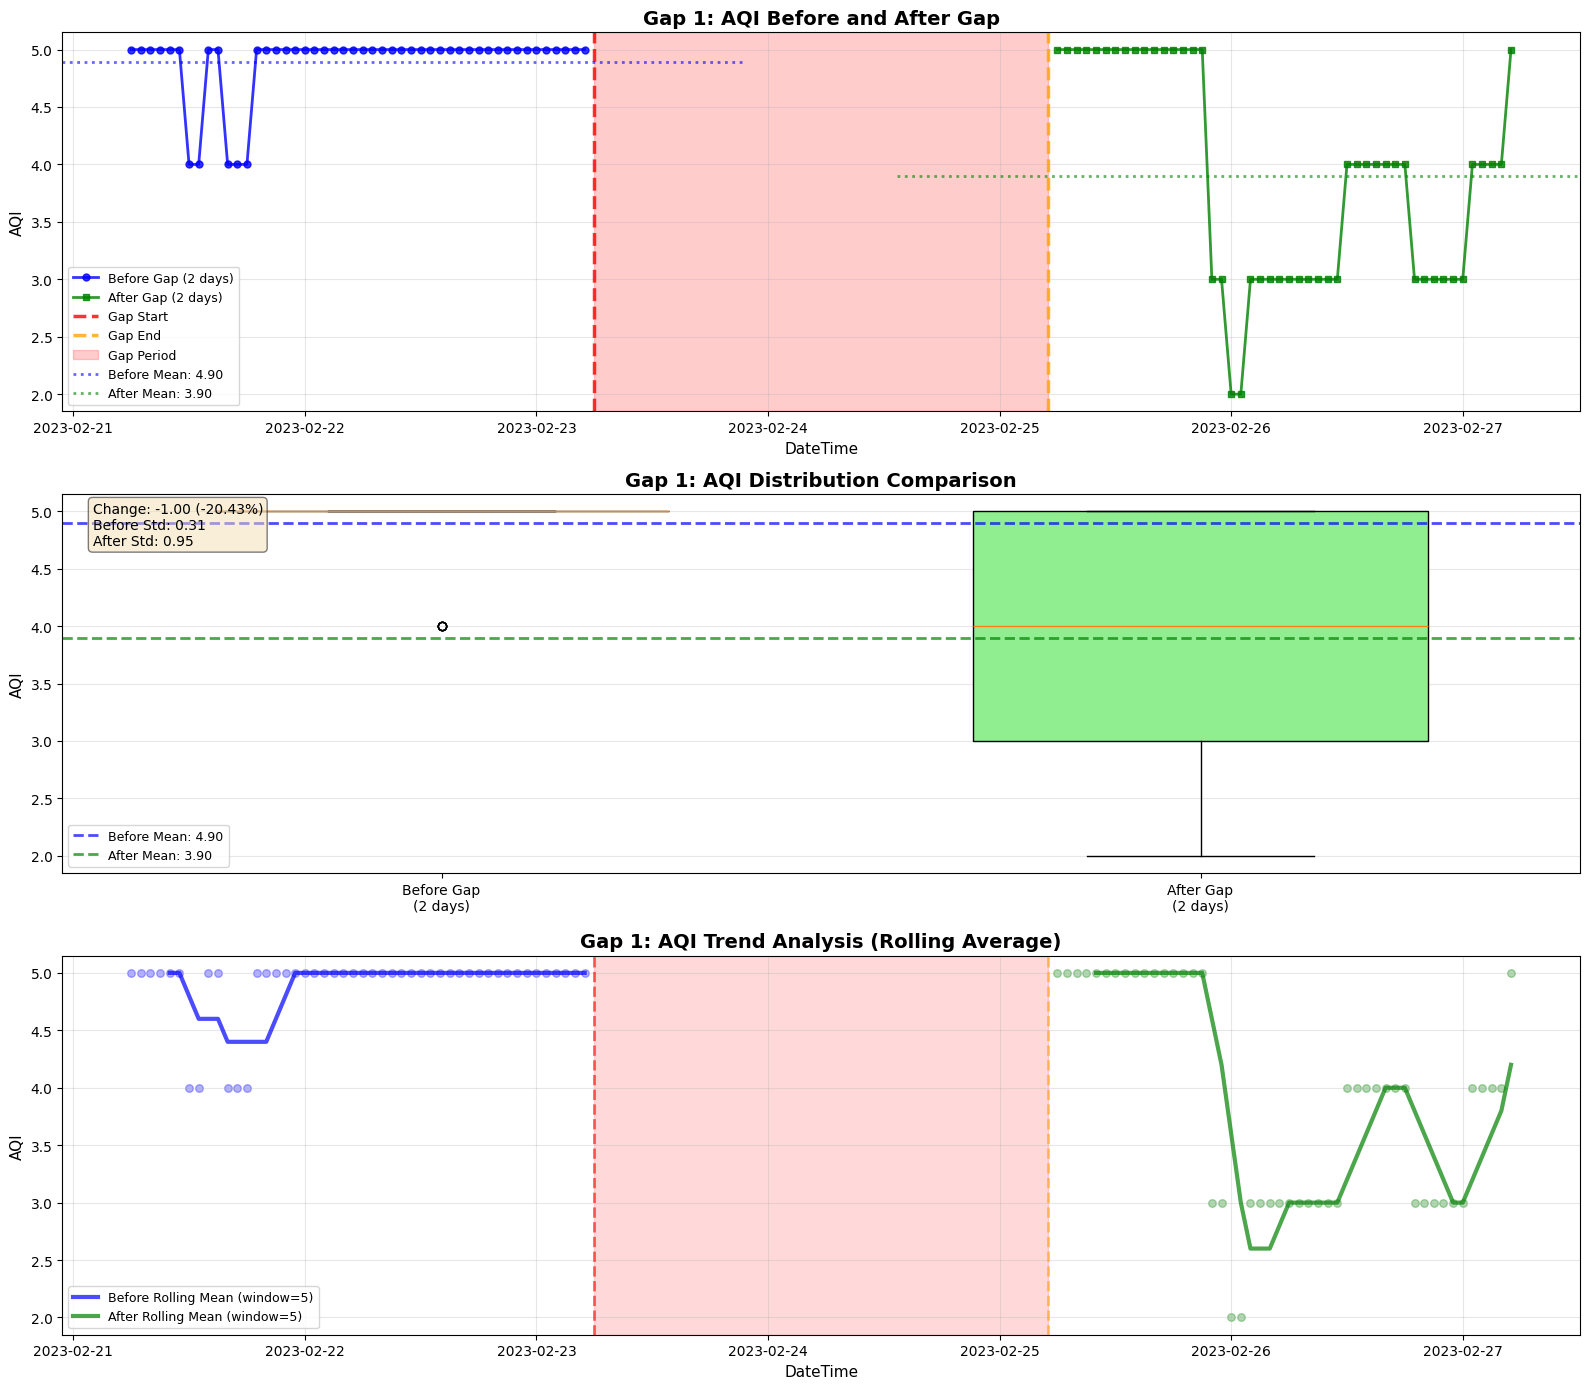

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1600x0 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure datetime is in proper format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])
combined_df = combined_df.sort_values('datetime').reset_index(drop=True)

# Define pollutants - ADJUST BASED ON YOUR DATASET
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']  # Change to your actual column names

# STEP 1: Identify gaps and group them
gaps = combined_df[combined_df['is_gap'] == True].copy()

if gaps.empty:
    print("No gaps found in the dataset!")
else:
    # Sort gaps by datetime
    gaps = gaps.sort_values('datetime').reset_index(drop=True)

    # Find consecutive gaps by comparing time differences
    gaps['time_diff'] = gaps['datetime'].diff()
    threshold = pd.Timedelta(hours=2)  # Adjust based on your data interval

    # Mark new gap periods
    gaps['new_gap_period'] = (gaps['time_diff'] > threshold) | (gaps['time_diff'].isna())
    gaps['gap_group'] = gaps['new_gap_period'].cumsum()

    # Get only non-gap data for analysis
    non_gap_data = combined_df[combined_df['is_gap'] == False].copy()

    # STEP 2: Analyze each gap period
    print("="*100)
    print("GAP ANALYSIS - Before and After Comparison (Non-Gap Data Only)")
    print("="*100)

    gap_analysis_results = []

    for gap_id, gap_group in gaps.groupby('gap_group'):
        gap_start = gap_group['datetime'].min()
        gap_end = gap_group['datetime'].max()
        gap_duration = gap_end - gap_start
        num_missing = len(gap_group)

        print(f"\n{'='*100}")
        print(f"GAP PERIOD {gap_id}")
        print(f"{'='*100}")
        print(f"Start: {gap_start}")
        print(f"End: {gap_end}")
        print(f"Duration: {gap_duration}")
        print(f"Missing records: {num_missing}")

        # Define time windows (2 days = 48 hours)
        before_window_start = gap_start - pd.Timedelta(days=2)
        before_window_end = gap_start
        after_window_start = gap_end
        after_window_end = gap_end + pd.Timedelta(days=2)

        # Get ONLY non-gap data before and after
        before_gap = non_gap_data[
            (non_gap_data['datetime'] >= before_window_start) &
            (non_gap_data['datetime'] < before_window_end)
        ]

        after_gap = non_gap_data[
            (non_gap_data['datetime'] > after_window_start) &
            (non_gap_data['datetime'] <= after_window_end)
        ]

        print(f"\nNon-gap records before gap (2 days): {len(before_gap)}")
        print(f"Non-gap records after gap (2 days): {len(after_gap)}")

        if len(before_gap) == 0 or len(after_gap) == 0:
            print("\nWARNING: Insufficient non-gap data before or after gap for analysis!")
            continue

        # STEP 3: Calculate statistics for AQI
        print(f"\n{'-'*100}")
        print("AQI ANALYSIS")
        print(f"{'-'*100}")

        aqi_before_mean = before_gap['aqi'].mean()
        aqi_before_std = before_gap['aqi'].std()
        aqi_before_min = before_gap['aqi'].min()
        aqi_before_max = before_gap['aqi'].max()
        aqi_before_median = before_gap['aqi'].median()

        aqi_after_mean = after_gap['aqi'].mean()
        aqi_after_std = after_gap['aqi'].std()
        aqi_after_min = after_gap['aqi'].min()
        aqi_after_max = after_gap['aqi'].max()
        aqi_after_median = after_gap['aqi'].median()

        aqi_diff_mean = aqi_after_mean - aqi_before_mean
        aqi_diff_percent = (aqi_diff_mean / aqi_before_mean) * 100 if aqi_before_mean != 0 else 0
        aqi_diff_median = aqi_after_median - aqi_before_median

        print(f"Before Gap:")
        print(f"  Mean: {aqi_before_mean:.2f}, Median: {aqi_before_median:.2f}")
        print(f"  Std Dev: {aqi_before_std:.2f}")
        print(f"  Range: [{aqi_before_min:.2f}, {aqi_before_max:.2f}]")

        print(f"\nAfter Gap:")
        print(f"  Mean: {aqi_after_mean:.2f}, Median: {aqi_after_median:.2f}")
        print(f"  Std Dev: {aqi_after_std:.2f}")
        print(f"  Range: [{aqi_after_min:.2f}, {aqi_after_max:.2f}]")

        print(f"\nDifference:")
        print(f"  Mean: {aqi_diff_mean:.2f} ({aqi_diff_percent:+.2f}%)")
        print(f"  Median: {aqi_diff_median:.2f}")

        # STEP 4: Calculate statistics for each pollutant
        print(f"\n{'-'*100}")
        print("POLLUTANT ANALYSIS")
        print(f"{'-'*100}")

        pollutant_stats = []

        for pollutant in pollutants:
            if pollutant in combined_df.columns:
                before_mean = before_gap[pollutant].mean()
                before_std = before_gap[pollutant].std()
                before_min = before_gap[pollutant].min()
                before_max = before_gap[pollutant].max()
                before_median = before_gap[pollutant].median()

                after_mean = after_gap[pollutant].mean()
                after_std = after_gap[pollutant].std()
                after_min = after_gap[pollutant].min()
                after_max = after_gap[pollutant].max()
                after_median = after_gap[pollutant].median()

                diff_mean = after_mean - before_mean
                diff_percent = (diff_mean / before_mean) * 100 if before_mean != 0 else 0
                diff_median = after_median - before_median

                print(f"\n{pollutant}:")
                print(f"  Before - Mean: {before_mean:.2f}, Median: {before_median:.2f}, Std: {before_std:.2f}, Range: [{before_min:.2f}, {before_max:.2f}]")
                print(f"  After  - Mean: {after_mean:.2f}, Median: {after_median:.2f}, Std: {after_std:.2f}, Range: [{after_min:.2f}, {after_max:.2f}]")
                print(f"  Diff   - Mean: {diff_mean:.2f} ({diff_percent:+.2f}%), Median: {diff_median:.2f}")

                pollutant_stats.append({
                    'pollutant': pollutant,
                    'before_mean': before_mean,
                    'before_median': before_median,
                    'before_std': before_std,
                    'after_mean': after_mean,
                    'after_median': after_median,
                    'after_std': after_std,
                    'diff_mean': diff_mean,
                    'diff_percent': diff_percent,
                    'diff_median': diff_median
                })

        # Store results for this gap
        gap_analysis_results.append({
            'gap_id': gap_id,
            'gap_start': gap_start,
            'gap_end': gap_end,
            'gap_duration': gap_duration,
            'num_missing': num_missing,
            'aqi_before_mean': aqi_before_mean,
            'aqi_before_median': aqi_before_median,
            'aqi_before_std': aqi_before_std,
            'aqi_after_mean': aqi_after_mean,
            'aqi_after_median': aqi_after_median,
            'aqi_after_std': aqi_after_std,
            'aqi_diff_mean': aqi_diff_mean,
            'aqi_diff_percent': aqi_diff_percent,
            'before_gap': before_gap,
            'after_gap': after_gap,
            'pollutant_stats': pollutant_stats
        })

        # STEP 5: Visualize this gap

        # 5.1 - AQI comparison plot
        fig, axes = plt.subplots(3, 1, figsize=(16, 14))

        # Plot 1: Time series - before and after
        axes[0].plot(before_gap['datetime'], before_gap['aqi'],
                    marker='o', linewidth=2, markersize=5, label='Before Gap (2 days)',
                    color='blue', alpha=0.8)
        axes[0].plot(after_gap['datetime'], after_gap['aqi'],
                    marker='s', linewidth=2, markersize=5, label='After Gap (2 days)',
                    color='green', alpha=0.8)

        # Mark gap boundaries
        axes[0].axvline(x=gap_start, color='red', linestyle='--', linewidth=2.5,
                       label='Gap Start', alpha=0.8)
        axes[0].axvline(x=gap_end, color='orange', linestyle='--', linewidth=2.5,
                       label='Gap End', alpha=0.8)

        # Shade gap period
        axes[0].axvspan(gap_start, gap_end, alpha=0.2, color='red', label='Gap Period')

        # Add mean lines
        axes[0].axhline(y=aqi_before_mean, xmin=0, xmax=0.45, color='blue',
                       linestyle=':', linewidth=2, alpha=0.6,
                       label=f'Before Mean: {aqi_before_mean:.2f}')
        axes[0].axhline(y=aqi_after_mean, xmin=0.55, xmax=1, color='green',
                       linestyle=':', linewidth=2, alpha=0.6,
                       label=f'After Mean: {aqi_after_mean:.2f}')

        axes[0].set_title(f'Gap {gap_id}: AQI Before and After Gap', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('DateTime', fontsize=11)
        axes[0].set_ylabel('AQI', fontsize=11)
        axes[0].legend(loc='best', fontsize=9)
        axes[0].grid(True, alpha=0.3)

        # Plot 2: Box plot comparison
        box_data = [before_gap['aqi'].dropna(), after_gap['aqi'].dropna()]
        box_labels = ['Before Gap\n(2 days)', 'After Gap\n(2 days)']

        bp = axes[1].boxplot(box_data, labels=box_labels, patch_artist=True, widths=0.6)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][1].set_facecolor('lightgreen')

        axes[1].set_title(f'Gap {gap_id}: AQI Distribution Comparison', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('AQI', fontsize=11)
        axes[1].grid(True, alpha=0.3, axis='y')

        # Add mean and median lines
        axes[1].axhline(y=aqi_before_mean, color='blue', linestyle='--', linewidth=2,
                       label=f'Before Mean: {aqi_before_mean:.2f}', alpha=0.7)
        axes[1].axhline(y=aqi_after_mean, color='green', linestyle='--', linewidth=2,
                       label=f'After Mean: {aqi_after_mean:.2f}', alpha=0.7)
        axes[1].legend(fontsize=9)

        # Add statistical annotation
        stats_text = f'Change: {aqi_diff_mean:+.2f} ({aqi_diff_percent:+.2f}%)\n'
        stats_text += f'Before Std: {aqi_before_std:.2f}\n'
        stats_text += f'After Std: {aqi_after_std:.2f}'
        axes[1].text(0.02, 0.98, stats_text, transform=axes[1].transAxes,
                    fontsize=10, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        # Plot 3: Rolling statistics comparison
        # Calculate rolling mean and std (if enough data)
        if len(before_gap) >= 5 and len(after_gap) >= 5:
            window_size = min(5, len(before_gap) // 3, len(after_gap) // 3)

            before_rolling_mean = before_gap.set_index('datetime')['aqi'].rolling(window=window_size).mean()
            after_rolling_mean = after_gap.set_index('datetime')['aqi'].rolling(window=window_size).mean()

            axes[2].plot(before_rolling_mean.index, before_rolling_mean.values,
                        linewidth=3, label=f'Before Rolling Mean (window={window_size})',
                        color='blue', alpha=0.7)
            axes[2].plot(after_rolling_mean.index, after_rolling_mean.values,
                        linewidth=3, label=f'After Rolling Mean (window={window_size})',
                        color='green', alpha=0.7)

            # Original data as scatter
            axes[2].scatter(before_gap['datetime'], before_gap['aqi'],
                           alpha=0.3, s=30, color='blue')
            axes[2].scatter(after_gap['datetime'], after_gap['aqi'],
                           alpha=0.3, s=30, color='green')

            axes[2].axvline(x=gap_start, color='red', linestyle='--', linewidth=2, alpha=0.6)
            axes[2].axvline(x=gap_end, color='orange', linestyle='--', linewidth=2, alpha=0.6)
            axes[2].axvspan(gap_start, gap_end, alpha=0.15, color='red')

            axes[2].set_title(f'Gap {gap_id}: AQI Trend Analysis (Rolling Average)',
                            fontsize=14, fontweight='bold')
            axes[2].set_xlabel('DateTime', fontsize=11)
            axes[2].set_ylabel('AQI', fontsize=11)
            axes[2].legend(fontsize=9)
            axes[2].grid(True, alpha=0.3)
        else:
            # If not enough data for rolling stats, show simple trend
            axes[2].plot(before_gap['datetime'], before_gap['aqi'],
                        linewidth=2, marker='o', markersize=4,
                        label='Before Gap Trend', color='blue', alpha=0.7)
            axes[2].plot(after_gap['datetime'], after_gap['aqi'],
                        linewidth=2, marker='s', markersize=4,
                        label='After Gap Trend', color='green', alpha=0.7)

            axes[2].axvline(x=gap_start, color='red', linestyle='--', linewidth=2, alpha=0.6)
            axes[2].axvline(x=gap_end, color='orange', linestyle='--', linewidth=2, alpha=0.6)
            axes[2].axvspan(gap_start, gap_end, alpha=0.15, color='red')

            axes[2].set_title(f'Gap {gap_id}: AQI Trend Analysis', fontsize=14, fontweight='bold')
            axes[2].set_xlabel('DateTime', fontsize=11)
            axes[2].set_ylabel('AQI', fontsize=11)
            axes[2].legend(fontsize=9)
            axes[2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(f'gap_{gap_id}_aqi_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 5.2 - Pollutant comparison plots
        num_pollutants = len([p for p in pollutants if p in combined_df.columns])
        fig, axes = plt.subplots(num_pollutants, 1, figsize=(16, 5*num_pollutants))

        if num_pollutants == 1:
            axes = [axes]

        idx = 0
        for pollutant in pollutants:
            if pollutant in combined_df.columns:
                axes[idx].plot(before_gap['datetime'], before_gap[pollutant],
                             marker='o', linewidth=2, markersize=4,
                             label='Before Gap (2 days)', color='blue', alpha=0.7)
                axes[idx].plot(after_gap['datetime'], after_gap[pollutant],
                             marker='s', linewidth=2, markersize=4,
                             label='After Gap (2 days)', color='green', alpha=0.7)

                # Mark gap boundaries
                axes[idx].axvline(x=gap_start, color='red', linestyle='--',
                                 linewidth=2, alpha=0.6, label='Gap Start')
                axes[idx].axvline(x=gap_end, color='orange', linestyle='--',
                                 linewidth=2, alpha=0.6, label='Gap End')
                axes[idx].axvspan(gap_start, gap_end, alpha=0.15, color='red')

                # Add mean lines
                pollutant_stat = next((p for p in pollutant_stats if p['pollutant'] == pollutant), None)
                if pollutant_stat:
                    axes[idx].axhline(y=pollutant_stat['before_mean'], xmin=0, xmax=0.45,
                                     color='blue', linestyle=':', linewidth=2, alpha=0.6)
                    axes[idx].axhline(y=pollutant_stat['after_mean'], xmin=0.55, xmax=1,
                                     color='green', linestyle=':', linewidth=2, alpha=0.6)

                axes[idx].set_title(f'{pollutant} - Gap {gap_id}', fontsize=13, fontweight='bold')
                axes[idx].set_xlabel('DateTime', fontsize=10)
                axes[idx].set_ylabel(f'{pollutant} Concentration', fontsize=10)
                axes[idx].legend(fontsize=8)
                axes[idx].grid(True, alpha=0.3)
                idx += 1

        plt.tight_layout()
        plt.savefig(f'gap_{gap_id}_pollutants_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 5.3 - Pollutant difference summary
        if len(pollutant_stats) > 0:
            diff_df = pd.DataFrame(pollutant_stats)

            fig, axes = plt.subplots(1, 3, figsize=(18, 6))

            # Plot 1: Mean differences
            colors = ['green' if x < 0 else 'red' for x in diff_df['diff_mean']]
            axes[0].barh(diff_df['pollutant'], diff_df['diff_mean'],
                        color=colors, edgecolor='black', linewidth=1.5)
            axes[0].axvline(x=0, color='black', linestyle='-', linewidth=2)
            axes[0].set_title(f'Gap {gap_id}: Mean Difference\n(After - Before)',
                            fontsize=13, fontweight='bold')
            axes[0].set_xlabel('Difference in Concentration', fontsize=11)
            axes[0].set_ylabel('Pollutant', fontsize=11)
            axes[0].grid(True, alpha=0.3, axis='x')

            # Add value labels
            for i, (pollutant, diff) in enumerate(zip(diff_df['pollutant'], diff_df['diff_mean'])):
                axes[0].text(diff, i, f' {diff:.2f}', va='center',
                           fontsize=9, fontweight='bold')

            # Plot 2: Percentage differences
            colors = ['green' if x < 0 else 'red' for x in diff_df['diff_percent']]
            axes[1].barh(diff_df['pollutant'], diff_df['diff_percent'],
                        color=colors, edgecolor='black', linewidth=1.5)
            axes[1].axvline(x=0, color='black', linestyle='-', linewidth=2)
            axes[1].set_title(f'Gap {gap_id}: Percentage Change\n(After - Before)',
                            fontsize=13, fontweight='bold')
            axes[1].set_xlabel('Percentage Change (%)', fontsize=11)
            axes[1].set_ylabel('Pollutant', fontsize=11)
            axes[1].grid(True, alpha=0.3, axis='x')

            # Add value labels
            for i, (pollutant, diff_pct) in enumerate(zip(diff_df['pollutant'], diff_df['diff_percent'])):
                axes[1].text(diff_pct, i, f' {diff_pct:.1f}%', va='center',
                           fontsize=9, fontweight='bold')

            # Plot 3: Standard deviation comparison
            x = np.arange(len(diff_df))
            width = 0.35

            axes[2].barh(x - width/2, diff_df['before_std'], width,
                        label='Before Gap', color='lightblue', edgecolor='black')
            axes[2].barh(x + width/2, diff_df['after_std'], width,
                        label='After Gap', color='lightgreen', edgecolor='black')
            axes[2].set_yticks(x)
            axes[2].set_yticklabels(diff_df['pollutant'])
            axes[2].set_title(f'Gap {gap_id}: Variability Comparison\n(Standard Deviation)',
                            fontsize=13, fontweight='bold')
            axes[2].set_xlabel('Standard Deviation', fontsize=11)
            axes[2].set_ylabel('Pollutant', fontsize=11)
            axes[2].legend(fontsize=9)
            axes[2].grid(True, alpha=0.3, axis='x')

            plt.tight_layout()
            plt.savefig(f'gap_{gap_id}_difference_summary.png', dpi=300, bbox_inches='tight')
            plt.show()

    # STEP 6: Overall summary across all gaps
    print("\n" + "="*100)
    print("OVERALL SUMMARY - ALL GAPS")
    print("="*100)

    if len(gap_analysis_results) > 0:
        summary_df = pd.DataFrame([
            {
                'Gap ID': r['gap_id'],
                'Start': r['gap_start'],
                'End': r['gap_end'],
                'Duration (hours)': r['gap_duration'].total_seconds() / 3600,
                'Missing Records': r['num_missing'],
                'AQI Before (Mean)': r['aqi_before_mean'],
                'AQI After (Mean)': r['aqi_after_mean'],
                'AQI Diff': r['aqi_diff_mean'],
                'AQI Diff %': r['aqi_diff_percent'],
                'Before Std': r['aqi_before_std'],
                'After Std': r['aqi_after_std']
            }
            for r in gap_analysis_results
        ])

        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('gap_analysis_summary.csv', index=False)
        print("\nSummary saved to 'gap_analysis_summary.csv'")

        # STEP 7: Gap filling strategy recommendations
        print("\n" + "="*100)
        print("GAP FILLING STRATEGY RECOMMENDATIONS")
        print("="*100)

        for result in gap_analysis_results:
            gap_id = result['gap_id']
            aqi_diff_percent = abs(result['aqi_diff_percent'])
            gap_duration_hours = result['gap_duration'].total_seconds() / 3600

            # Calculate stability metric
            avg_std = (result['aqi_before_std'] + result['aqi_after_std']) / 2
            stability = 'High' if avg_std < 10 else 'Medium' if avg_std < 20 else 'Low'

            print(f"\n{'─'*100}")
            print(f"Gap {gap_id}:")
            print(f"  Duration: {gap_duration_hours:.1f} hours ({gap_duration_hours/24:.1f} days)")
            print(f"  AQI change (Before → After): {result['aqi_diff_percent']:+.2f}%")
            print(f"  Data stability: {stability} (Avg Std Dev: {avg_std:.2f})")

            # Strategy recommendation
            print(f"\n  RECOMMENDED FILLING STRATEGY:")

            if gap_duration_hours <= 3:
                print(f"  → PRIMARY: Linear interpolation")
                print(f"     REASON: Very short gap (<= 3 hours)")
                print(f"  → ALTERNATIVE: Forward/backward fill")

            elif aqi_diff_percent < 5 and stability == 'High':
                print(f"  → PRIMARY: Linear interpolation or mean imputation")
                print(f"     REASON: Stable values with minimal change (< 5%)")
                print(f"  → ALTERNATIVE: Forward/backward fill")

            elif aqi_diff_percent < 15:
                print(f"  → PRIMARY: Spline interpolation (cubic)")
                print(f"     REASON: Moderate change (5-15%)")
                print(f"  → ALTERNATIVE: Time-weighted interpolation")

            else:
                print(f"  → PRIMARY: Machine learning model (LSTM, Random Forest)")
                print(f"     REASON: Significant change (> 15%) - complex pattern")
                print(f"  → ALTERNATIVE: ARIMA or seasonal decomposition")

            if gap_duration_hours > 48:
                print(f"\n  ⚠ SPECIAL CONSIDERATIONS (Long gap > 48 hours):")
                print(f"     • Consider external data sources (nearby monitoring stations)")
                print(f"     • Incorporate weather data and seasonal patterns")
                print(f"     • Use ensemble methods (combine multiple approaches)")
                print(f"     • Validate with domain knowledge")

            if stability == 'Low':
                print(f"\n  ⚠ NOTE: Low stability detected - use conservative estimates")
                print(f"     • Consider confidence intervals")
                print(f"     • Flag filled data for review")

        # STEP 8: Pollutant-specific recommendations
        print("\n" + "="*100)
        print("POLLUTANT-SPECIFIC INSIGHTS")
        print("="*100)

        # Aggregate pollutant changes across all gaps
        all_pollutant_changes = {}
        for result in gap_analysis_results:
            for pstat in result['pollutant_stats']:
                pollutant = pstat['pollutant']
                if pollutant not in all_pollutant_changes:
                    all_pollutant_changes[pollutant] = []
                all_pollutant_changes[pollutant].append(abs(pstat['diff_percent']))

        print("\nAverage absolute percentage change across all gaps:")
        for pollutant, changes in all_pollutant_changes.items():
            avg_change = np.mean(changes)
            max_change = np.max(changes)
            print(f"  {pollutant}: Avg = {avg_change:.2f}%, Max = {max_change:.2f}%")

            if avg_change > 20:
                print(f"    → High variability - use advanced interpolation methods")
            elif avg_change < 5:
                print(f"    → Low variability - simple methods sufficient")

        print("\n" + "="*100)
        print("GENERAL RECOMMENDATIONS:")
        print("="*100)
        print("1. Always validate filled data against known patterns and domain knowledge")
        print("2. Use cross-validation to compare different filling methods")
        print("3. Document the method used for each gap and its parameters")
        print("4. Consider creating confidence intervals or uncertainty estimates")
        print("5. Flag filled data in your dataset for transparency")
        print("6. For critical applications, consult with domain experts")
        print("="*100)

        print("\n" + "="*100)
        print("Analysis complete! All visualizations and summary saved.")
        print("="*100)

    else:
        print("\nNo gaps with sufficient surrounding data for analysis.")

# Removing gap rows:

In [ ]:
# Removing all rows where is_gap is true
combined_df = combined_df[combined_df['is_gap'] == False]

# Resetting index after removing rows
combined_df = combined_df.reset_index(drop=True)

# Display shape of dataframe after dropping gap records
print(f"Shape: {combined_df.shape}")

# Verifying
print(f"Remaining gap records: {combined_df['is_gap'].sum()}")

Shape: (26568, 19)
Remaining gap records: 0


# visualizing rate of change of AQI:

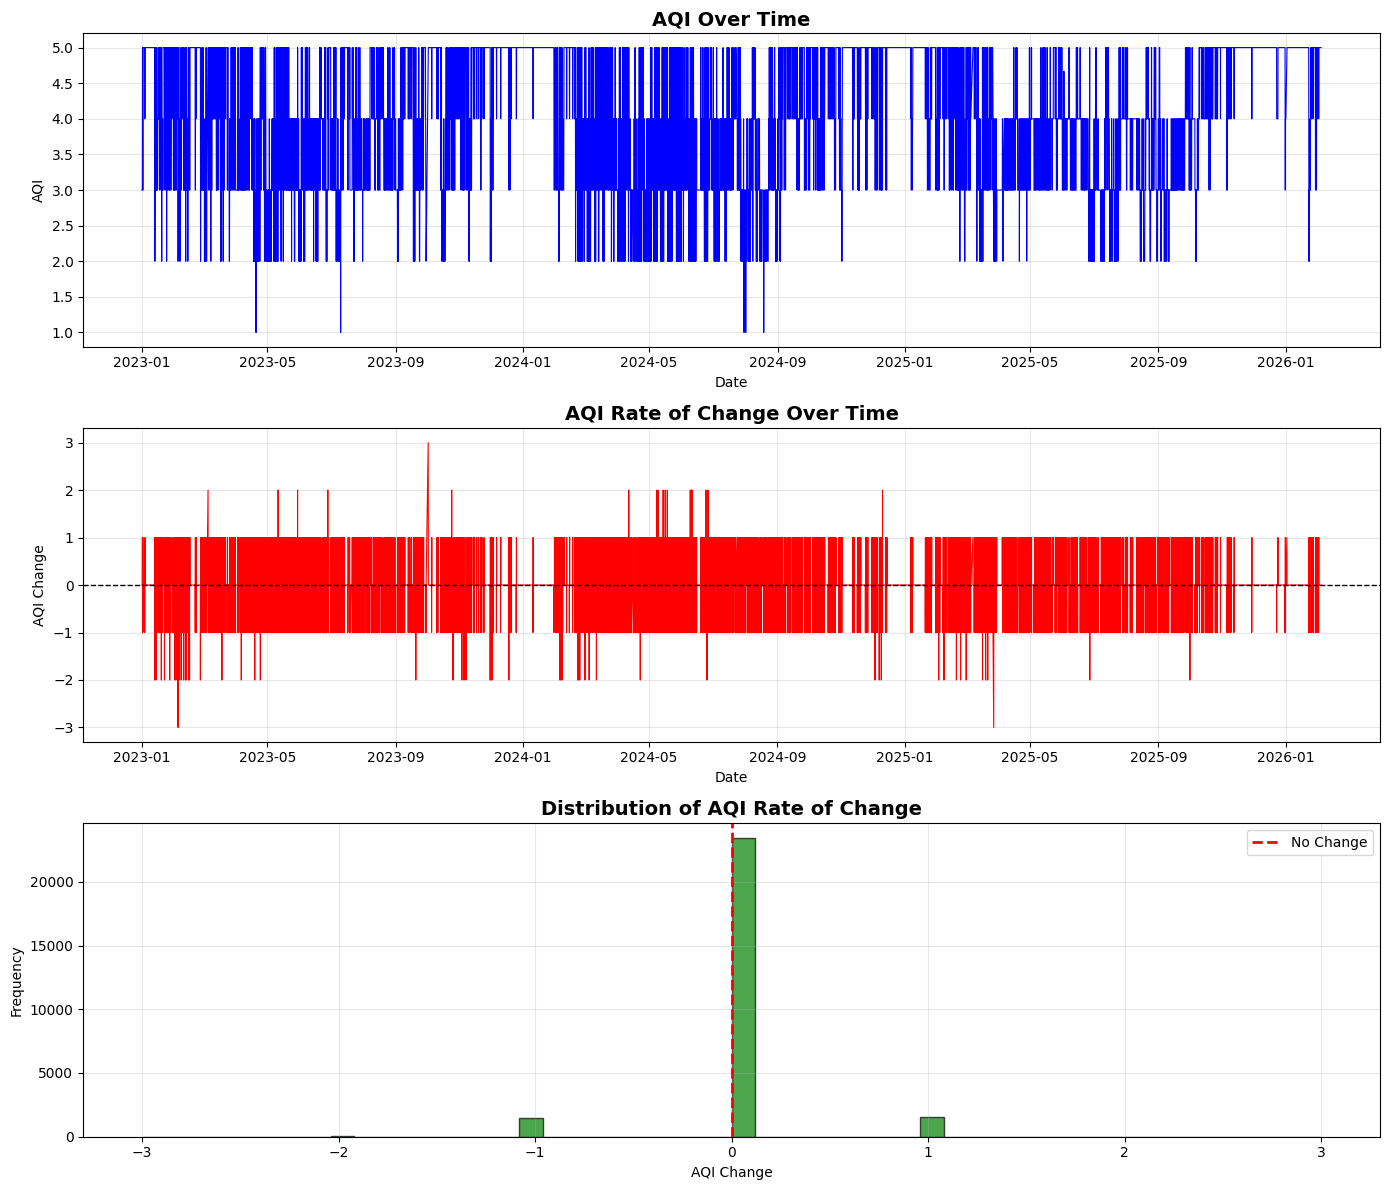


Maximum increase: 3.0
Maximum decrease: -3.0


In [ ]:
# Calculate the rate of change of AQI
# Assuming your AQI column is named 'AQI' - change if different
combined_df['AQI_change'] = combined_df['aqi'].diff()

# Convert datetime to datetime type if needed
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Create visualizations
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: AQI over time
axes[0].plot(combined_df['datetime'], combined_df['aqi'], color='blue', linewidth=0.8)
axes[0].set_title('AQI Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('AQI')
axes[0].grid(True, alpha=0.3)

# Plot 2: Rate of change (difference) over time
axes[1].plot(combined_df['datetime'], combined_df['AQI_change'], color='red', linewidth=0.8)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_title('AQI Rate of Change Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('AQI Change')
axes[1].grid(True, alpha=0.3)

# Plot 3: Distribution of rate of change (histogram)
axes[2].hist(combined_df['AQI_change'].dropna(), bins=50, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribution of AQI Rate of Change', fontsize=14, fontweight='bold')
axes[2].set_xlabel('AQI Change')
axes[2].set_ylabel('Frequency')
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Change')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Displaying other statistics
print(f"\nMaximum increase: {combined_df['AQI_change'].max()}")
print(f"Maximum decrease: {combined_df['AQI_change'].min()}")

change statistics:

In [ ]:
# Checking for the difference more than 1 in aqi category:
target_changes = [2, -2, -3, 3]

# Displaying information for each target change
for change_value in target_changes:
    # Filter rows where AQI_change equals the target value
    filtered = combined_df[combined_df['AQI_change'] == change_value]
    count = len(filtered)

    print(f"\n{'='*70}")
    print(f"AQI Change = {change_value}")
    print(f"Number of occurrences: {count}")

    if count > 0:
        print("Dates when this occurred:")
        print(filtered[['datetime', 'aqi', 'AQI_change']].to_string(index=False))
    else:
        print("No occurrences found.")

# Summary table
print(f"\n{'='*70}")
print("SUMMARY:")
for change_value in target_changes:
    count = len(combined_df[combined_df['AQI_change'] == change_value])
    print(f"AQI change of {change_value:>3}: {count} times")


AQI Change = 2
Number of occurrences: 17
Dates when this occurred:
           datetime  aqi  AQI_change
2023-03-05 06:00:00  5.0         2.0
2023-05-11 10:00:00  5.0         2.0
2023-05-30 01:00:00  5.0         2.0
2023-06-28 01:00:00  5.0         2.0
2023-10-24 18:00:00  5.0         2.0
2024-04-11 11:00:00  5.0         2.0
2024-05-08 10:00:00  5.0         2.0
2024-05-09 10:00:00  5.0         2.0
2024-05-14 10:00:00  5.0         2.0
2024-05-16 10:00:00  5.0         2.0
2024-05-18 10:00:00  5.0         2.0
2024-06-09 10:00:00  5.0         2.0
2024-06-10 09:00:00  4.0         2.0
2024-06-11 10:00:00  5.0         2.0
2024-06-24 10:00:00  5.0         2.0
2024-06-26 10:00:00  5.0         2.0
2024-12-10 16:00:00  5.0         2.0

AQI Change = -2
Number of occurrences: 52
Dates when this occurred:
           datetime  aqi  AQI_change
2023-01-13 04:00:00  3.0        -2.0
2023-01-14 12:00:00  3.0        -2.0
2023-01-19 12:00:00  3.0        -2.0
2023-01-22 12:00:00  3.0        -2.0
2023-01-27 1

# Rate of change of concentrations of different pollutants:

Calculating rate of change for each pollutant...

SUMMARY STATISTICS - Rate of Change for Each Pollutant
Pollutant  Mean Change    Std Dev  Max Increase  Max Decrease  Median Change
    pm2_5     0.002477  14.275029        136.63       -277.72           0.92
     pm10     0.003545  88.831295      10058.20     -10057.07           1.07
      no2     0.000531 122.900962      10012.71     -10017.51           0.00
      so2     0.000131   1.226986         36.72        -11.44          -0.03
       co     0.018908 167.141205       1014.71      -3271.11          10.20
       o3     0.000334  89.678102      10137.76     -10136.33          -2.86


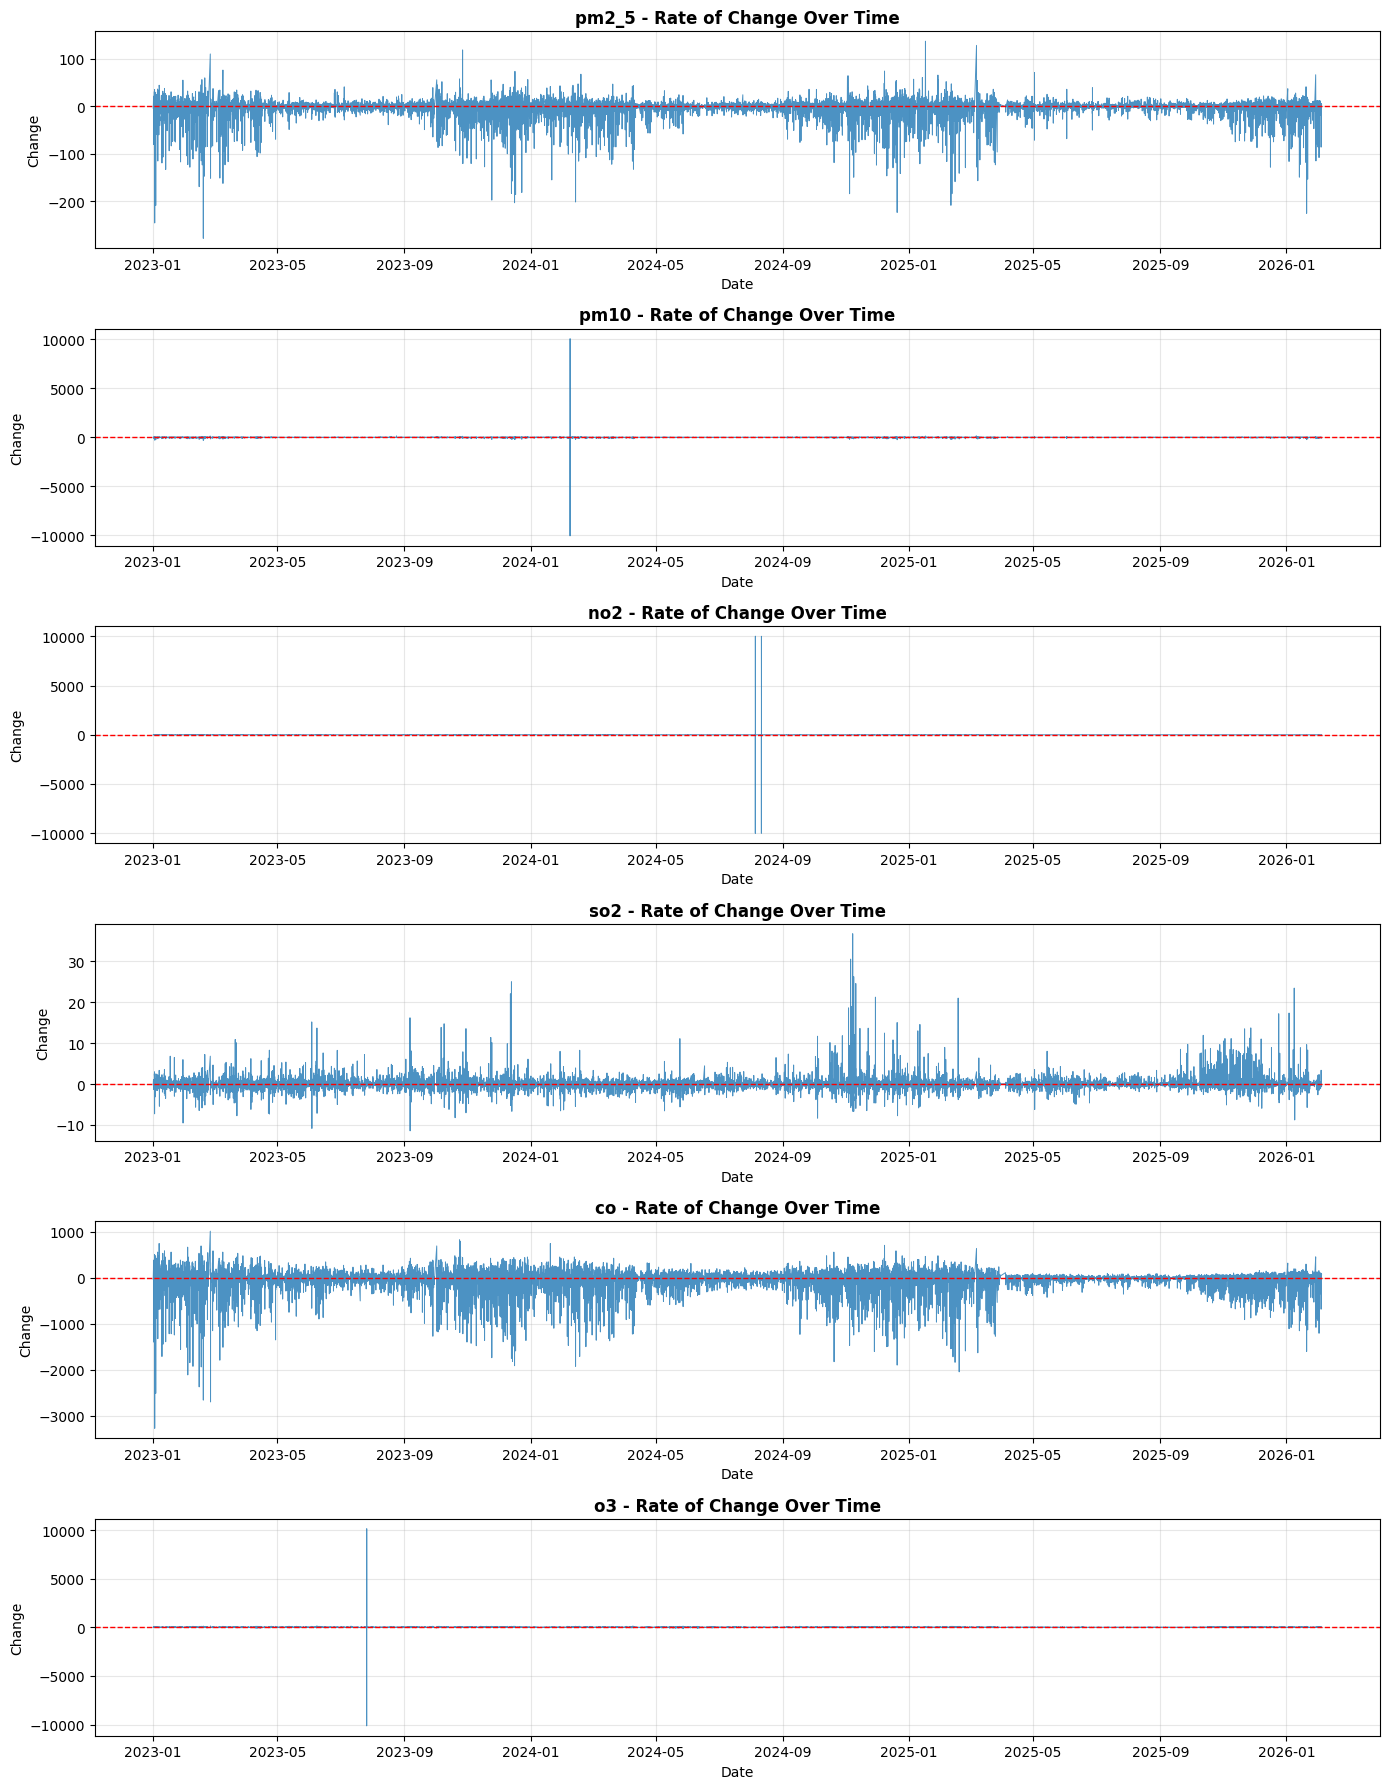

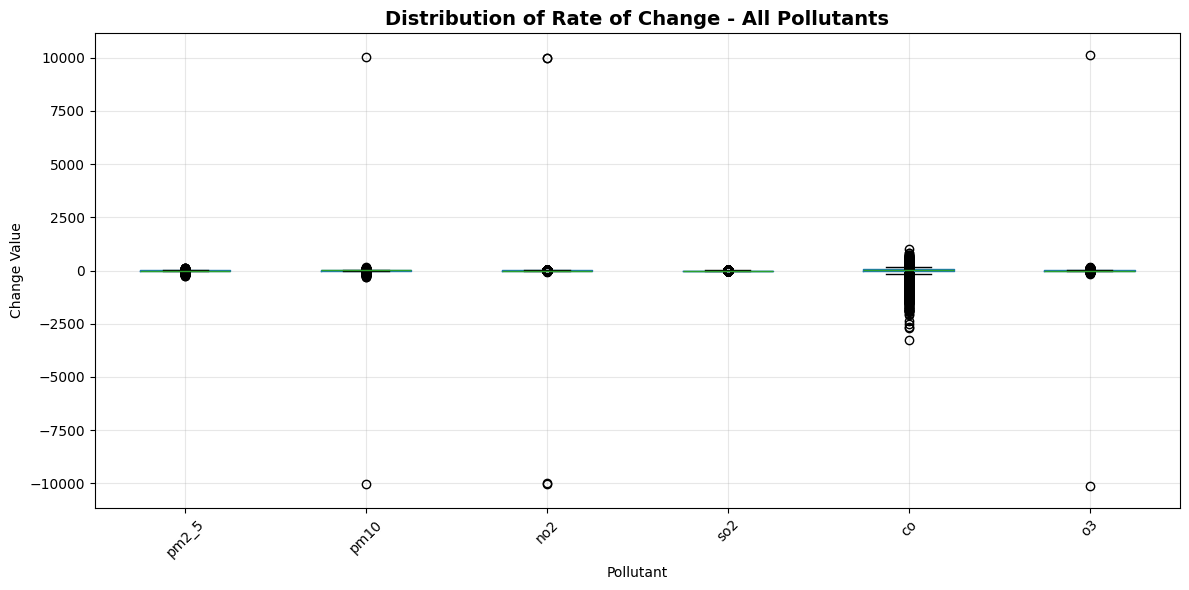

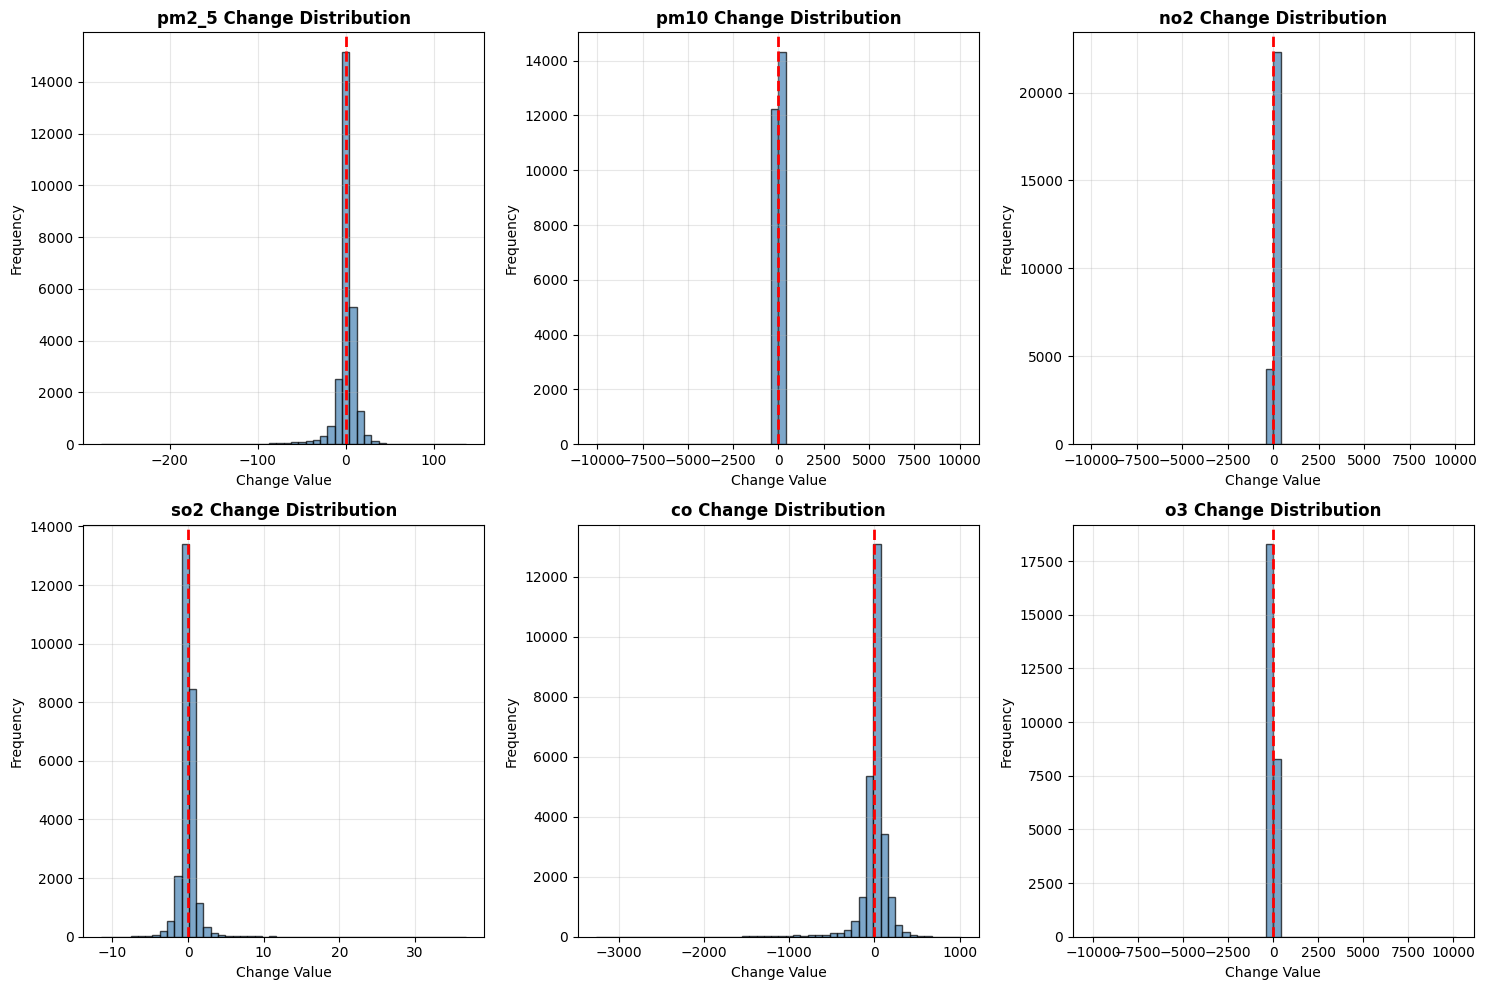

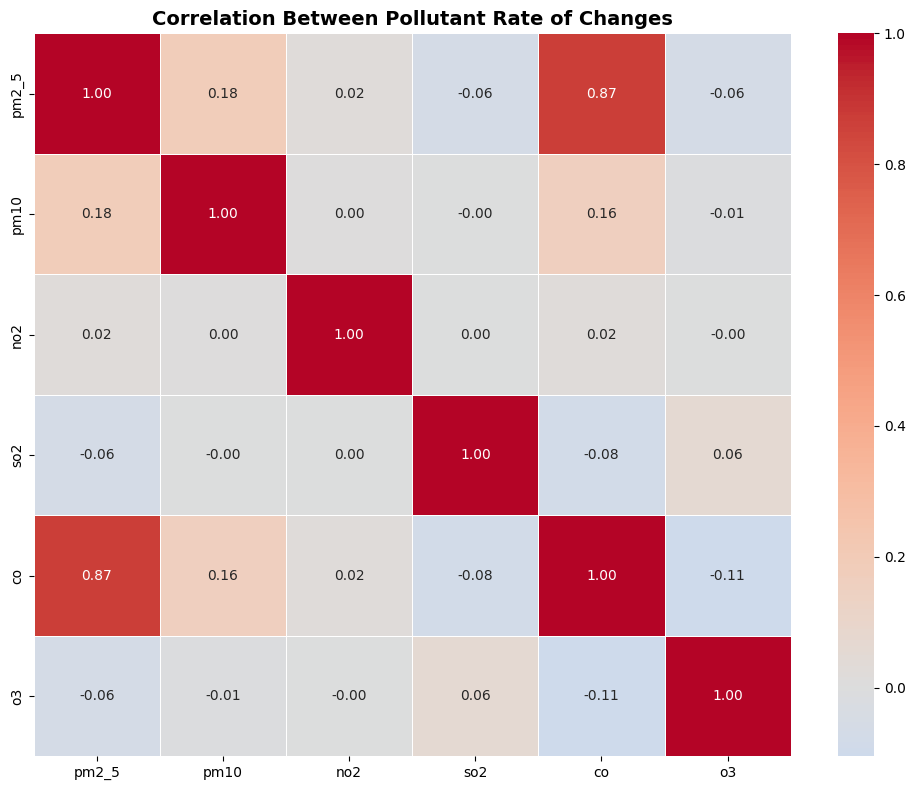

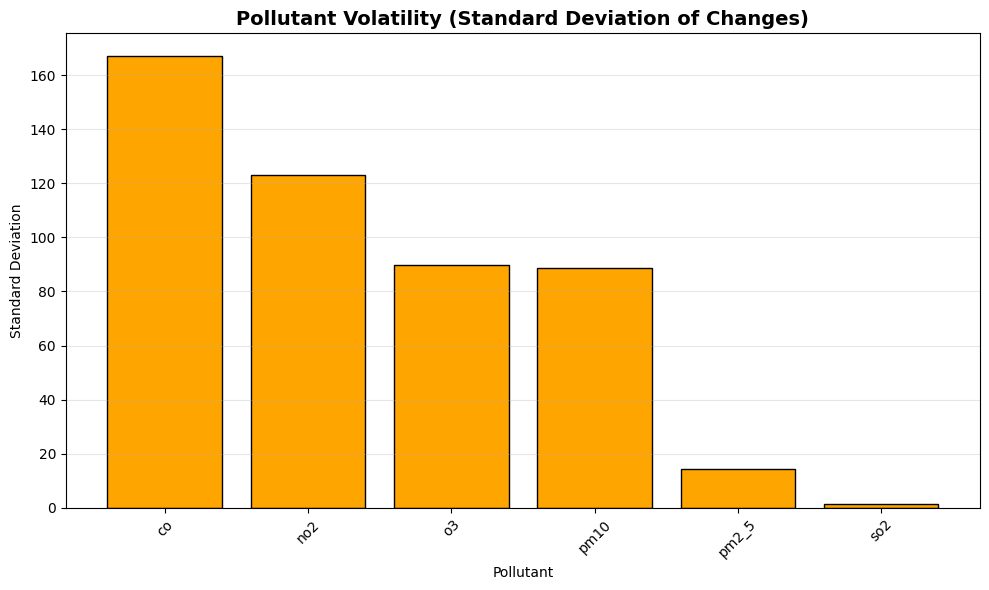


VOLATILITY RANKING (Most to Least Volatile)
Pollutant    Std Dev
       co 167.141205
      no2 122.900962
       o3  89.678102
     pm10  88.831295
    pm2_5  14.275029
      so2   1.226986

EXTREME CHANGES DETECTED

pm2_5:
  Extreme increases (>28.55): 237 times
  Extreme decreases (<-28.55): 697 times

pm10:
  Extreme increases (>177.67): 1 times
  Extreme decreases (<-177.66): 20 times

no2:
  Extreme increases (>245.80): 2 times
  Extreme decreases (<-245.80): 2 times

so2:
  Extreme increases (>2.45): 466 times
  Extreme decreases (<-2.45): 448 times

co:
  Extreme increases (>334.30): 228 times
  Extreme decreases (<-334.26): 696 times

o3:
  Extreme increases (>179.36): 1 times
  Extreme decreases (<-179.36): 1 times

Analysis complete! Visualizations saved as PNG files.


In [ ]:
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']  # CHANGE TO YOUR ACTUAL COLUMN NAMES

# STEP 1: Calculate rate of change for each pollutant
print("Calculating rate of change for each pollutant...")
for pollutant in pollutants:
    if pollutant in combined_df.columns:
        combined_df[f'{pollutant}_change'] = combined_df[pollutant].diff()
    else:
        print(f"Warning: Column '{pollutant}' not found in dataset")

# STEP 2: Summary Statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS - Rate of Change for Each Pollutant")
print("="*80)

summary_data = []
for pollutant in pollutants:
    change_col = f'{pollutant}_change'
    if change_col in combined_df.columns:
        stats = {
            'Pollutant': pollutant,
            'Mean Change': combined_df[change_col].mean(),
            'Std Dev': combined_df[change_col].std(),
            'Max Increase': combined_df[change_col].max(),
            'Max Decrease': combined_df[change_col].min(),
            'Median Change': combined_df[change_col].median()
        }
        summary_data.append(stats)

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# STEP 3: Visualizations

# 3.1 - Line plots: Rate of change over time for all pollutants
fig, axes = plt.subplots(len(pollutants), 1, figsize=(14, 3*len(pollutants)))

for idx, pollutant in enumerate(pollutants):
    change_col = f'{pollutant}_change'
    if change_col in combined_df.columns:
        ax = axes[idx] if len(pollutants) > 1 else axes
        ax.plot(combined_df['datetime'], combined_df[change_col], linewidth=0.7, alpha=0.8)
        ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
        ax.set_title(f'{pollutant} - Rate of Change Over Time', fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Change')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pollutant_changes_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.2 - Box plots: Compare distribution of changes
change_columns = [f'{p}_change' for p in pollutants if f'{p}_change' in combined_df.columns]

plt.figure(figsize=(12, 6))
combined_df[change_columns].boxplot()
plt.title('Distribution of Rate of Change - All Pollutants', fontsize=14, fontweight='bold')
plt.xlabel('Pollutant')
plt.ylabel('Change Value')
plt.xticks(range(1, len(change_columns)+1), [col.replace('_change', '') for col in change_columns], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pollutant_changes_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.3 - Histograms: Distribution for each pollutant
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    change_col = f'{pollutant}_change'
    if change_col in combined_df.columns and idx < len(axes):
        axes[idx].hist(combined_df[change_col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].axvline(x=0, color='red', linestyle='--', linewidth=2)
        axes[idx].set_title(f'{pollutant} Change Distribution', fontweight='bold')
        axes[idx].set_xlabel('Change Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pollutant_changes_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.4 - Correlation heatmap: Which pollutants change together?
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[change_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            xticklabels=[col.replace('_change', '') for col in change_columns],
            yticklabels=[col.replace('_change', '') for col in change_columns],
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Pollutant Rate of Changes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('pollutant_changes_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.5 - Volatility comparison (Standard Deviation)
plt.figure(figsize=(10, 6))
volatility = summary_df[['Pollutant', 'Std Dev']].sort_values('Std Dev', ascending=False)
plt.bar(volatility['Pollutant'], volatility['Std Dev'], color='orange', edgecolor='black')
plt.title('Pollutant Volatility (Standard Deviation of Changes)', fontsize=14, fontweight='bold')
plt.xlabel('Pollutant')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('pollutant_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

# STEP 4: Identify most volatile pollutants
print("\n" + "="*80)
print("VOLATILITY RANKING (Most to Least Volatile)")
print("="*80)
print(volatility.to_string(index=False))

# STEP 5: Find extreme changes
print("\n" + "="*80)
print("EXTREME CHANGES DETECTED")
print("="*80)

for pollutant in pollutants:
    change_col = f'{pollutant}_change'
    if change_col in combined_df.columns:
        # Define extreme as changes beyond 2 standard deviations
        mean = combined_df[change_col].mean()
        std = combined_df[change_col].std()
        threshold = 2 * std

        extreme_increases = combined_df[combined_df[change_col] > (mean + threshold)]
        extreme_decreases = combined_df[combined_df[change_col] < (mean - threshold)]

        print(f"\n{pollutant}:")
        print(f"  Extreme increases (>{mean + threshold:.2f}): {len(extreme_increases)} times")
        print(f"  Extreme decreases (<{mean - threshold:.2f}): {len(extreme_decreases)} times")

print("\n" + "="*80)
print("Analysis complete! Visualizations saved as PNG files.")
print("="*80)

# Visualizing daily and weekly patterns:

HOURLY PATTERNS - AQI STATISTICS
       aqi                       
      mean median  min  max   std
hour                             
0     4.04    4.0  2.0  5.0  0.98
1     4.03    4.0  2.0  5.0  0.99
2     4.03    4.0  2.0  5.0  0.99
3     4.03    4.0  2.0  5.0  0.98
4     4.03    4.0  2.0  5.0  0.99
5     4.03    4.0  1.0  5.0  0.99
6     4.02    4.0  1.0  5.0  1.00
7     4.07    4.0  1.0  5.0  0.98
8     4.12    4.0  2.0  5.0  0.97
9     4.14    4.0  2.0  5.0  0.94
10    4.27    5.0  2.0  5.0  0.87
11    4.42    5.0  1.0  5.0  0.80
12    4.13    4.0  1.0  5.0  0.83
13    4.03    4.0  1.0  5.0  0.83
14    3.99    4.0  1.0  5.0  0.83
15    3.96    4.0  1.0  5.0  0.84
16    3.96    4.0  2.0  5.0  0.86
17    3.95    4.0  2.0  5.0  0.88
18    3.86    4.0  1.0  5.0  0.95
19    3.86    4.0  1.0  5.0  1.01
20    3.90    4.0  1.0  5.0  1.02
21    3.94    4.0  1.0  5.0  1.01
22    4.01    4.0  2.0  5.0  0.99
23    4.05    4.0  2.0  5.0  0.97

DAILY PATTERNS - AQI STATISTICS
            aqi 

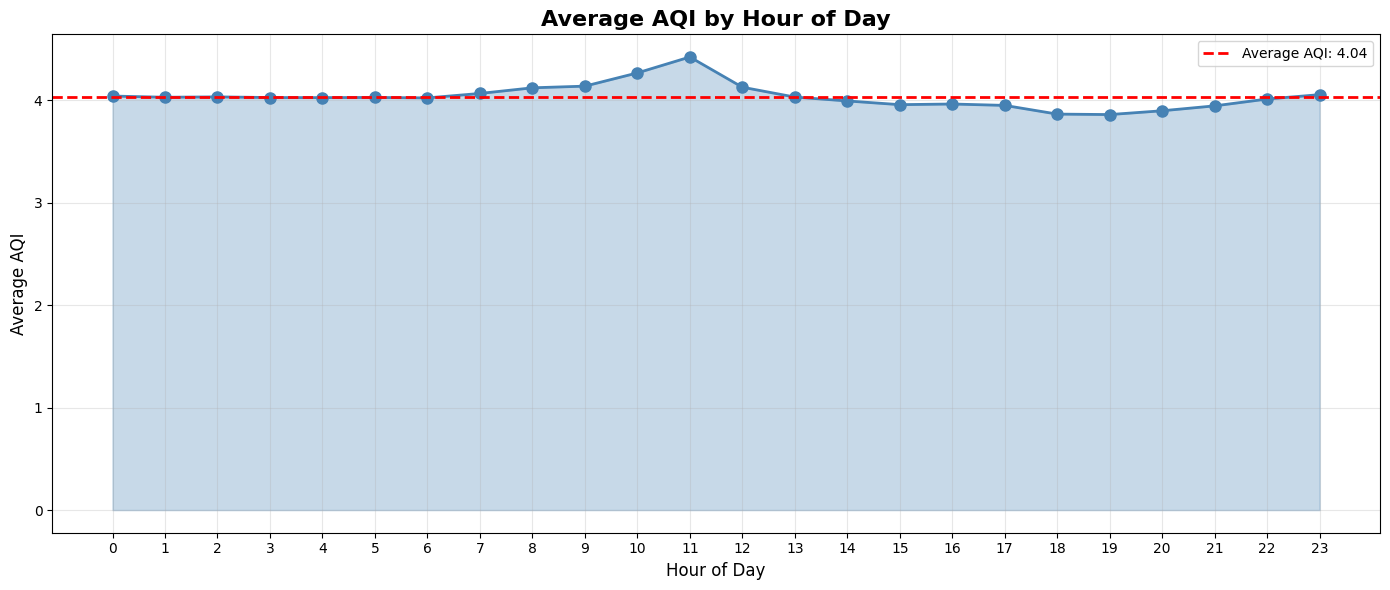

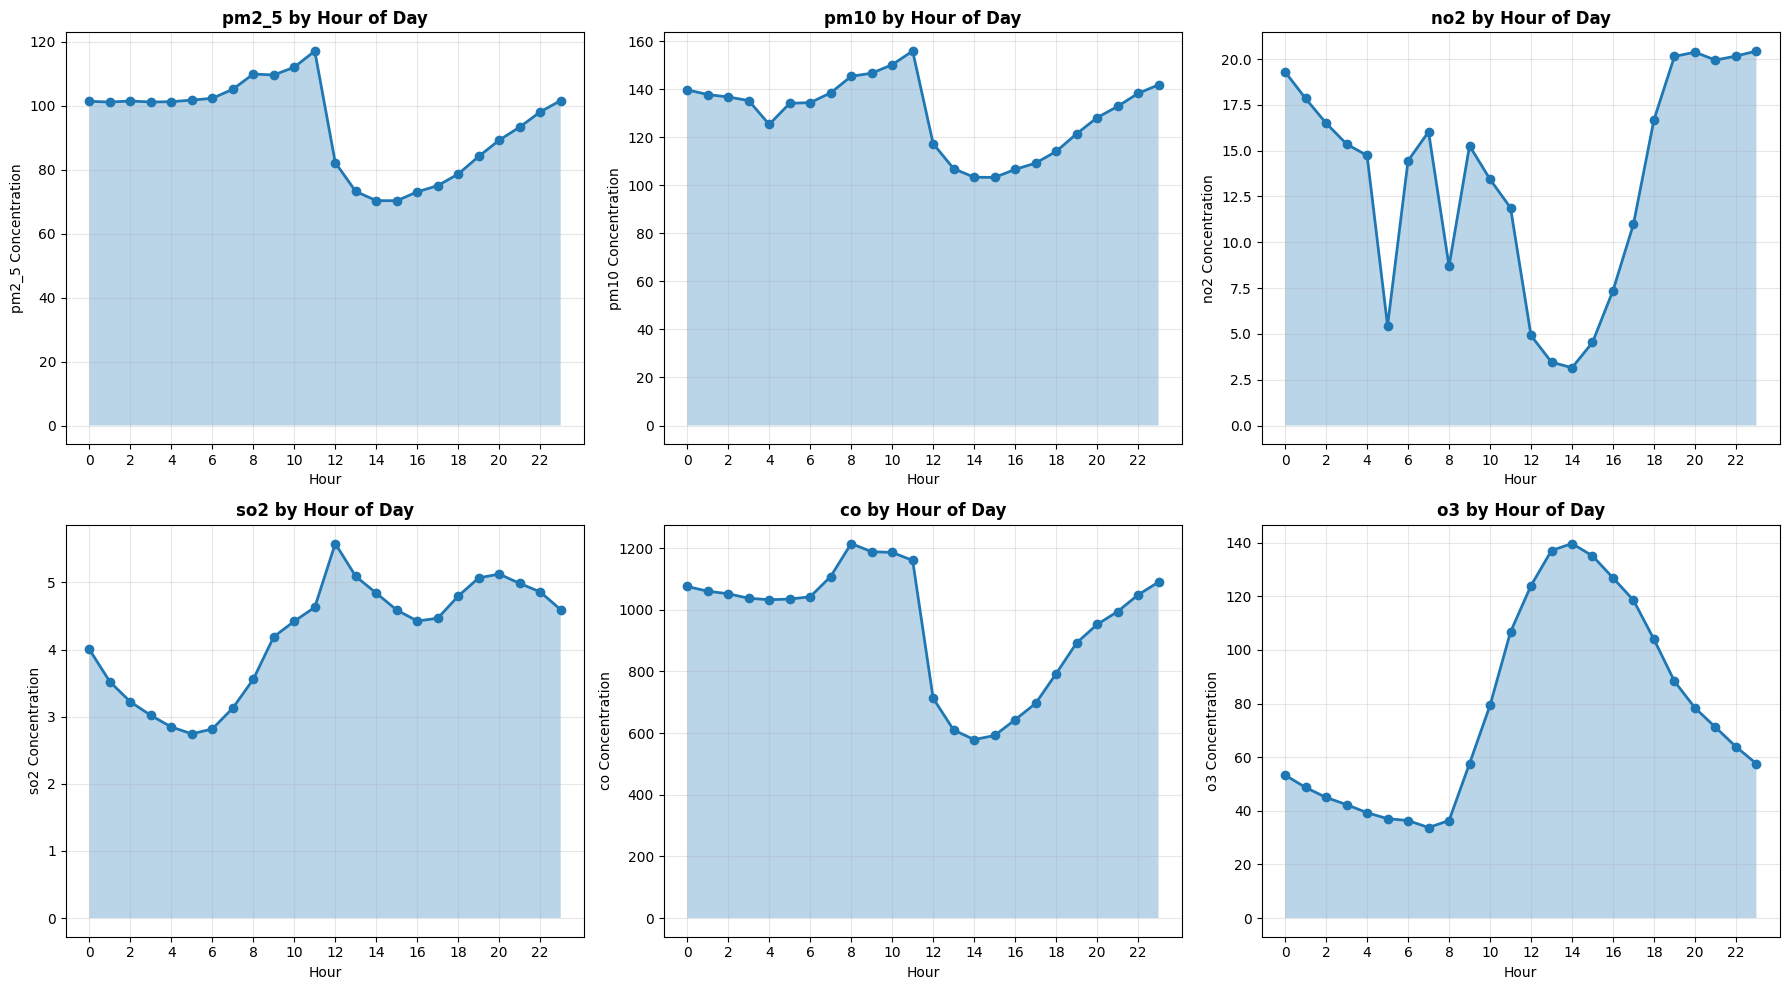

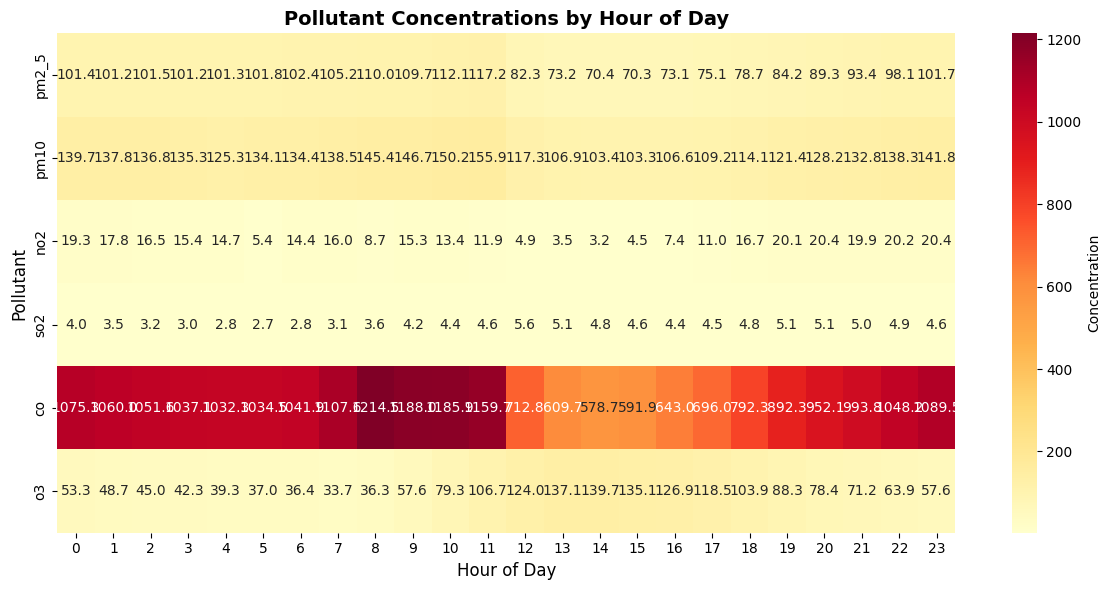

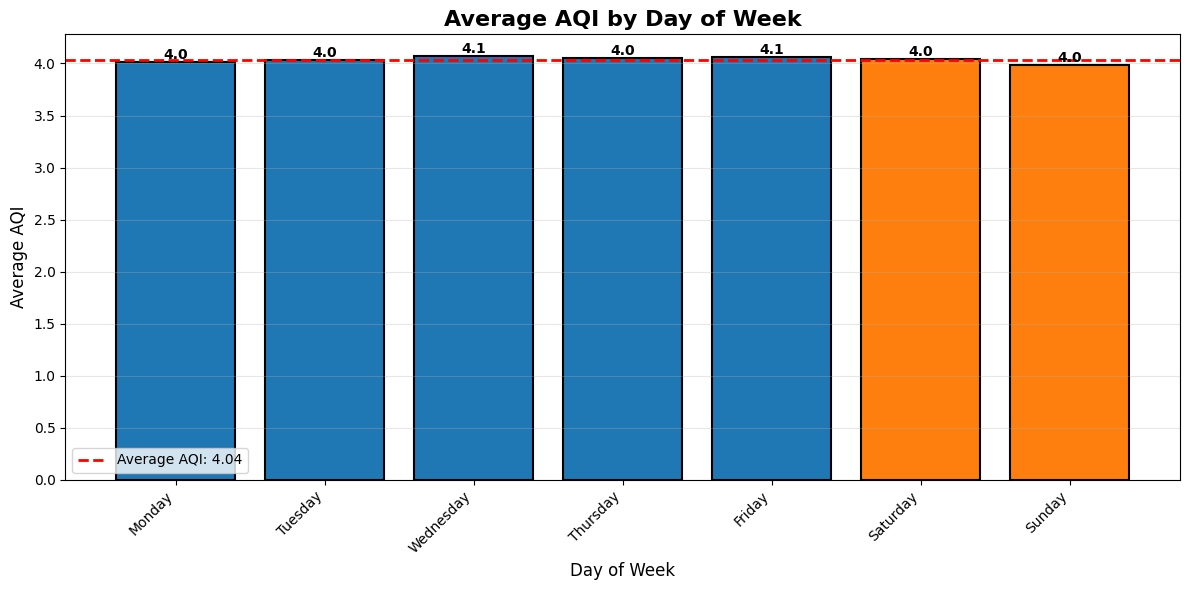

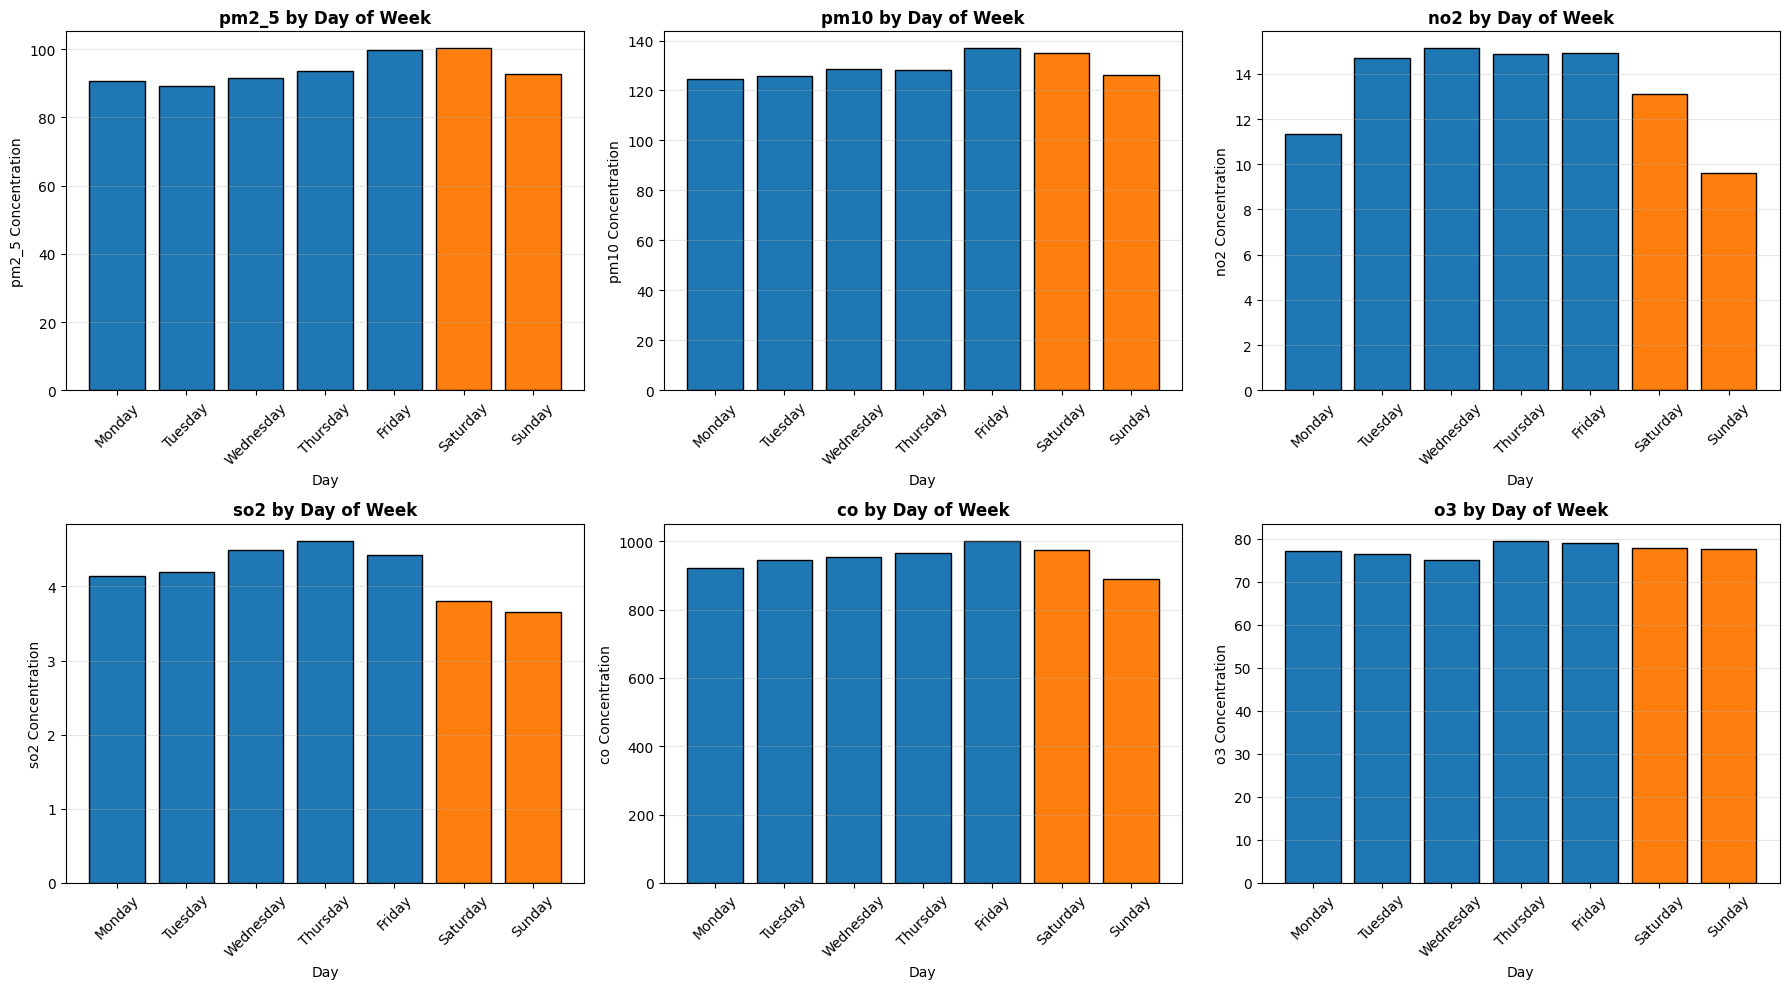

/tmp/ipython-input-171865314.py:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_name_ordered', y='aqi', data=combined_df_sorted, palette='Set2')


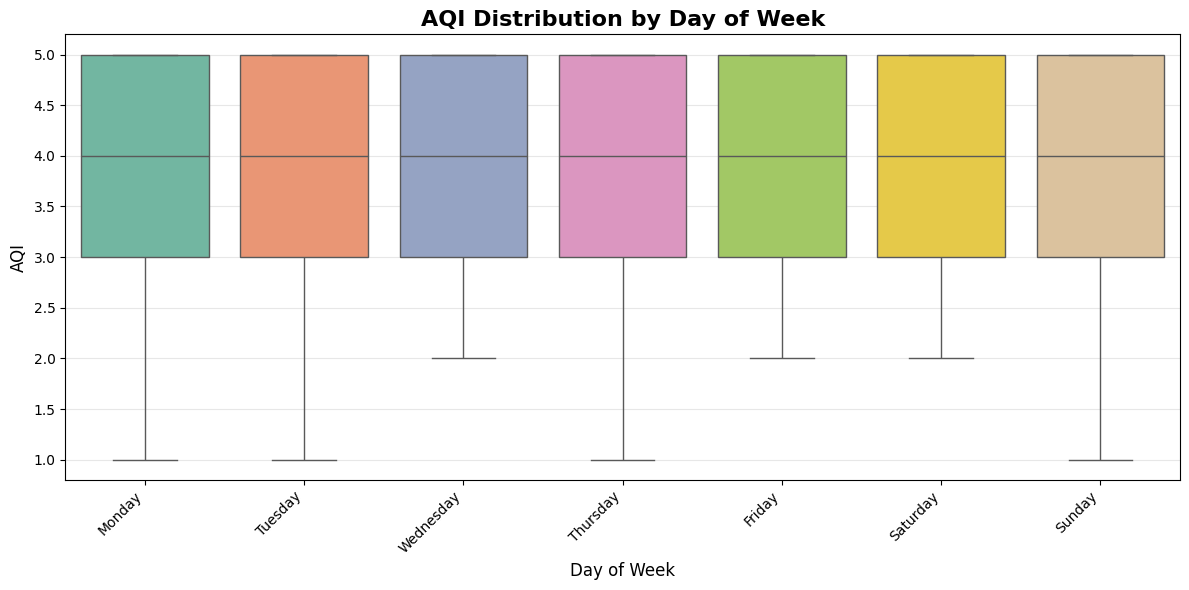

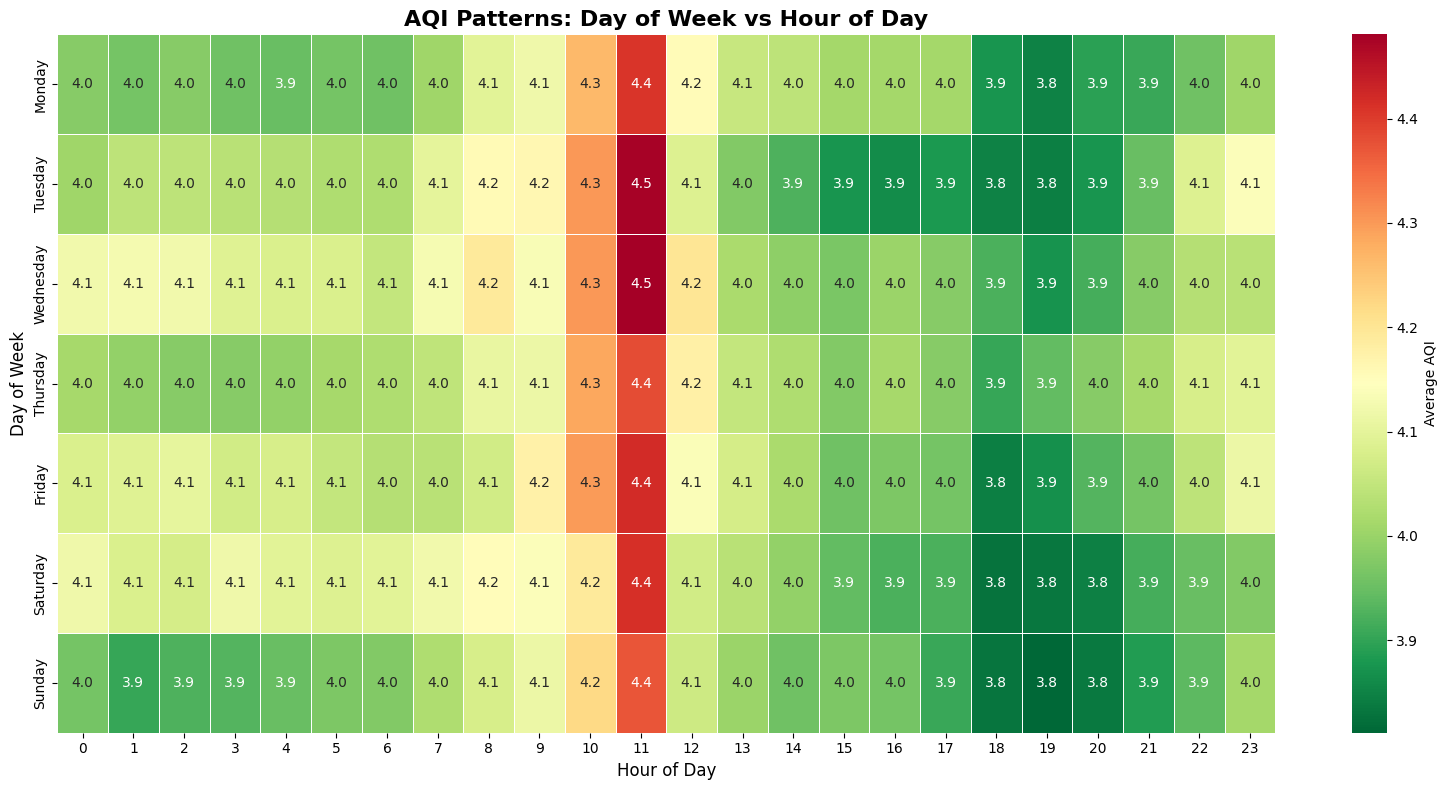

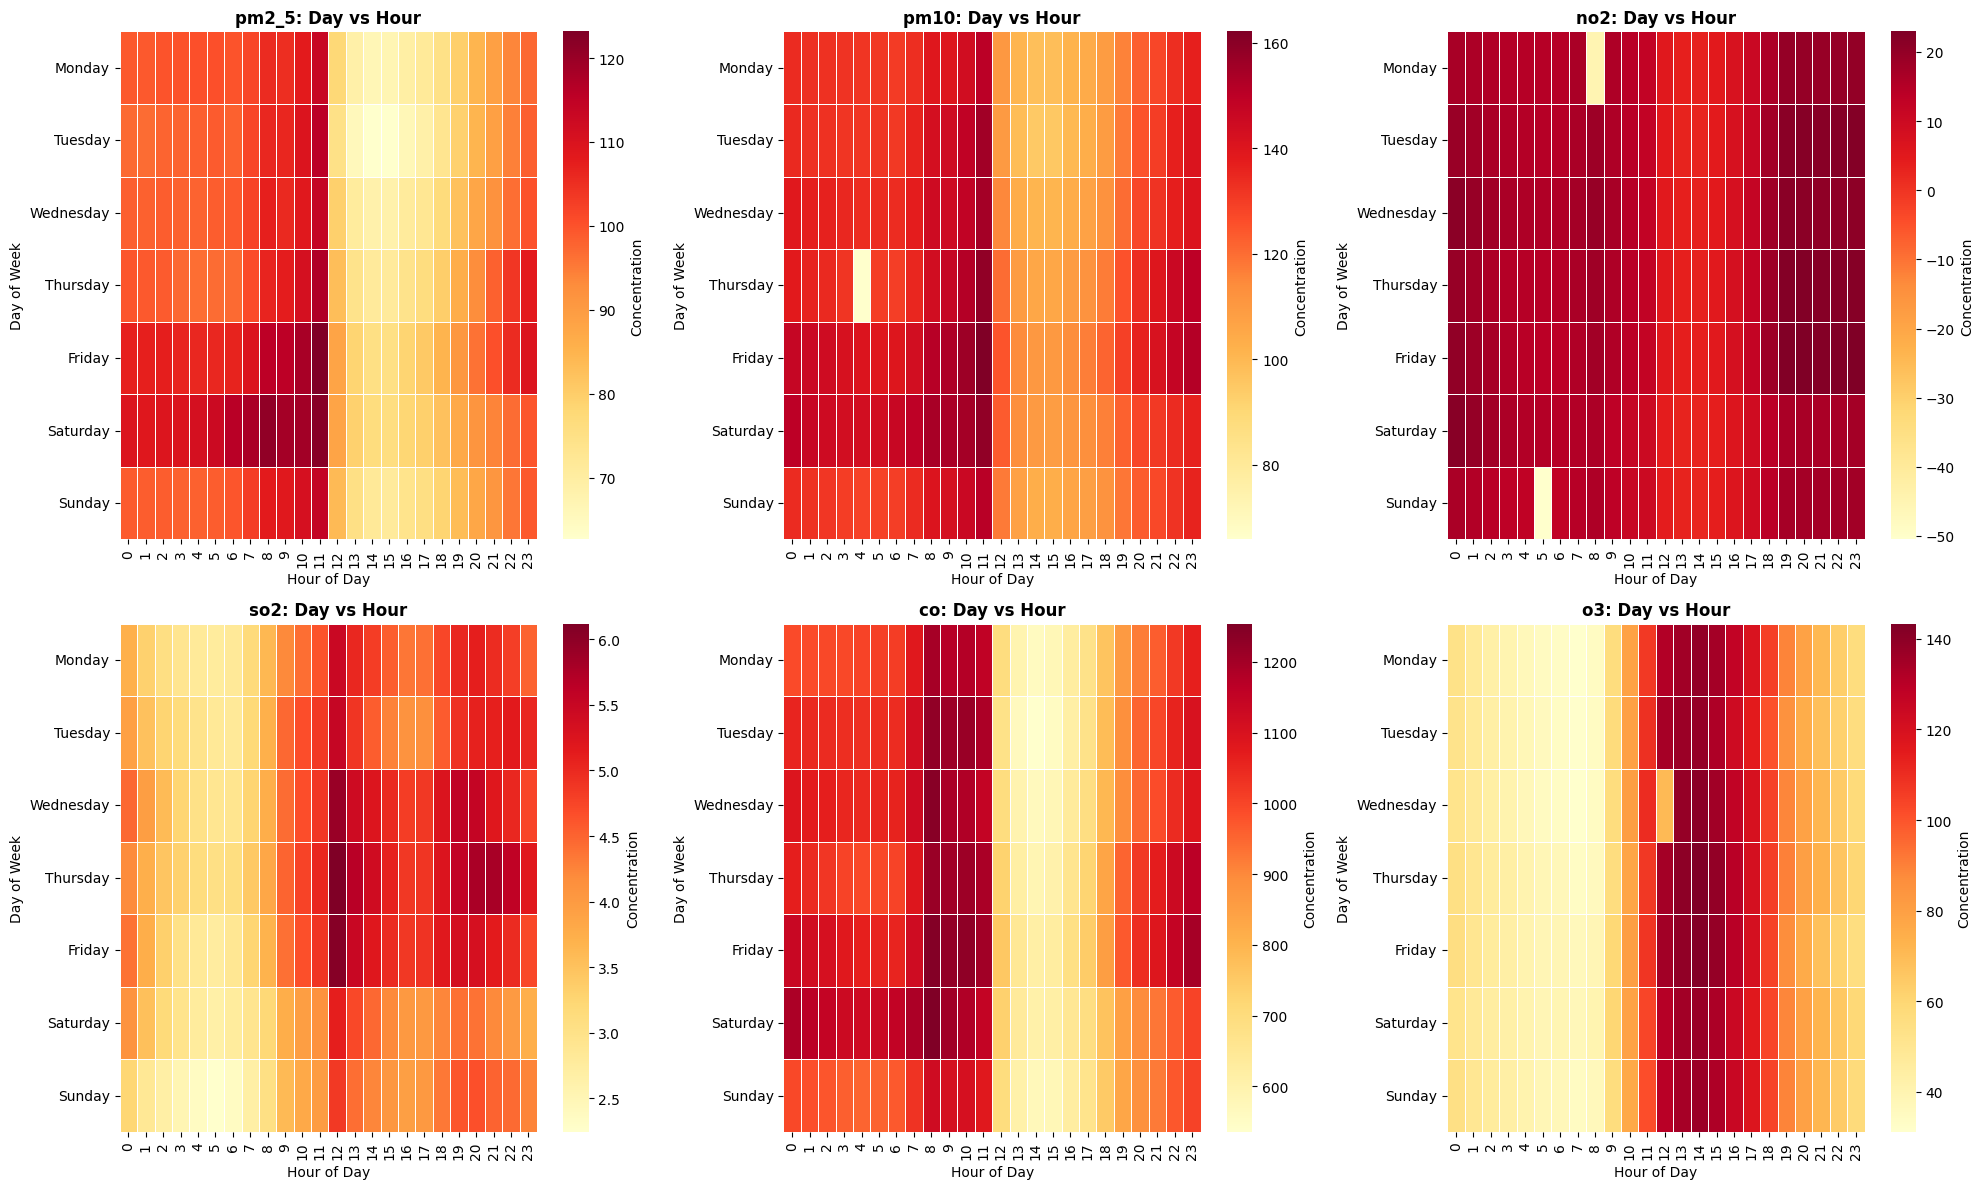

/tmp/ipython-input-171865314.py:232: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([weekday_data, weekend_data], labels=['Weekday', 'Weekend'])


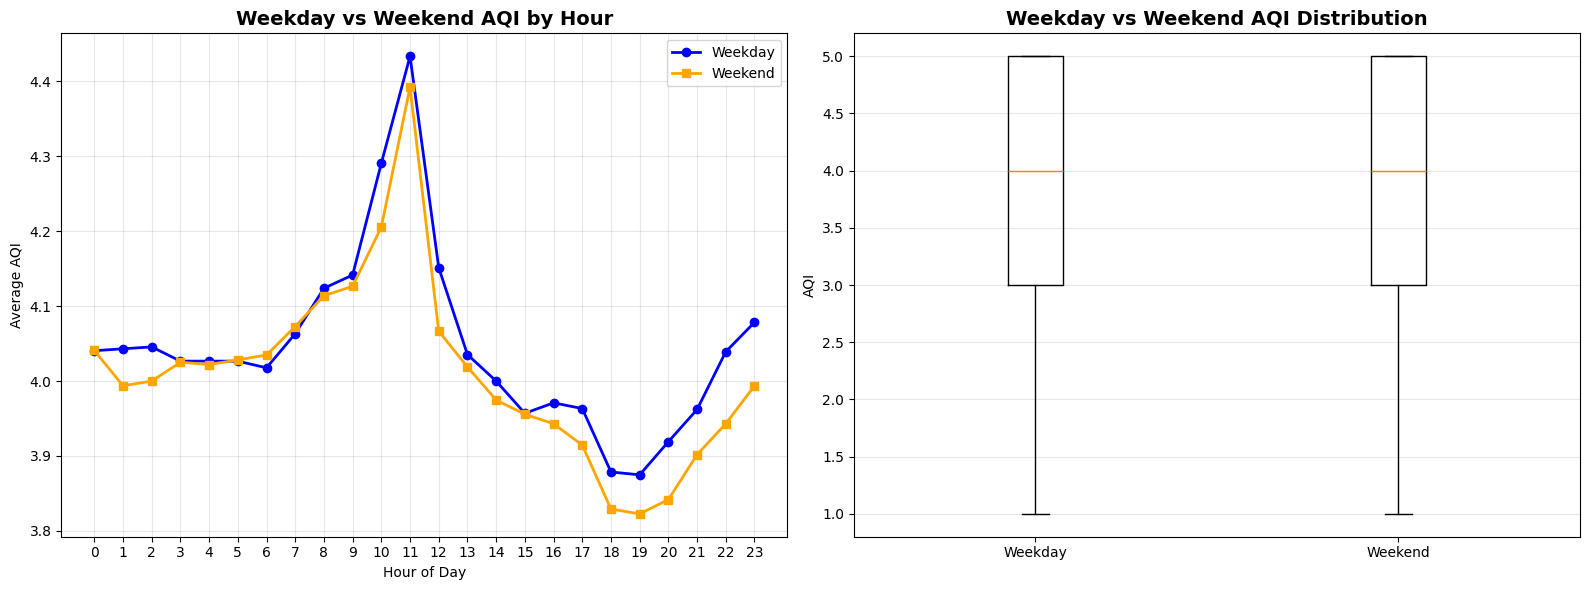

In [ ]:
# Ensure datetime is in proper format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# STEP 1: Extract time components
combined_df['hour'] = combined_df['datetime'].dt.hour
combined_df['day_of_week'] = combined_df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
combined_df['day_name'] = combined_df['datetime'].dt.day_name()

# Define pollutants
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']

# STEP 2: Calculate hourly statistics
hourly_stats = combined_df.groupby('hour').agg({
    'aqi': ['mean', 'median', 'min', 'max', 'std']
}).round(2)

daily_stats = combined_df.groupby('day_name').agg({
    'aqi': ['mean', 'median', 'min', 'max', 'std']
}).round(2)

# STEP 3: Print Statistical Summary
print("="*80)
print("HOURLY PATTERNS - AQI STATISTICS")
print("="*80)
print(hourly_stats)

print("\n" + "="*80)
print("DAILY PATTERNS - AQI STATISTICS")
print("="*80)
# Reorder days to start from Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats_ordered = daily_stats.reindex(day_order)
print(daily_stats_ordered)

# Find peak hours
hourly_mean = combined_df.groupby('hour')['aqi'].mean()
peak_hour = hourly_mean.idxmax()
cleanest_hour = hourly_mean.idxmin()

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)
print(f"Peak pollution hour: {peak_hour}:00 (AQI: {hourly_mean[peak_hour]:.2f})")
print(f"Cleanest hour: {cleanest_hour}:00 (AQI: {hourly_mean[cleanest_hour]:.2f})")

# Find most/least polluted days
daily_mean = combined_df.groupby('day_name')['aqi'].mean()
daily_mean_ordered = daily_mean.reindex(day_order)
most_polluted_day = daily_mean_ordered.idxmax()
cleanest_day = daily_mean_ordered.idxmin()

print(f"\nMost polluted day: {most_polluted_day} (AQI: {daily_mean_ordered[most_polluted_day]:.2f})")
print(f"Cleanest day: {cleanest_day} (AQI: {daily_mean_ordered[cleanest_day]:.2f})")

# Weekday vs Weekend comparison
combined_df['is_weekend'] = combined_df['day_of_week'].isin([5, 6])  # Saturday=5, Sunday=6
weekend_aqi = combined_df[combined_df['is_weekend'] == True]['aqi'].mean()
weekday_aqi = combined_df[combined_df['is_weekend'] == False]['aqi'].mean()

print(f"\nAverage Weekday AQI: {weekday_aqi:.2f}")
print(f"Average Weekend AQI: {weekend_aqi:.2f}")
print(f"Difference: {abs(weekend_aqi - weekday_aqi):.2f}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

# STEP 4: Hourly Patterns Visualizations

# 4.1 - AQI by Hour of Day (Line Plot)
plt.figure(figsize=(14, 6))
hourly_aqi = combined_df.groupby('hour')['aqi'].mean()
plt.plot(hourly_aqi.index, hourly_aqi.values, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.fill_between(hourly_aqi.index, hourly_aqi.values, alpha=0.3, color='steelblue')
plt.axhline(y=hourly_aqi.mean(), color='red', linestyle='--', linewidth=2, label=f'Average AQI: {hourly_aqi.mean():.2f}')
plt.title('Average AQI by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('aqi_hourly_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.2 - Pollutant Concentrations by Hour (Multiple Lines)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    if pollutant in combined_df.columns and idx < len(axes):
        hourly_pollutant = combined_df.groupby('hour')[pollutant].mean()
        axes[idx].plot(hourly_pollutant.index, hourly_pollutant.values, marker='o', linewidth=2, markersize=6)
        axes[idx].fill_between(hourly_pollutant.index, hourly_pollutant.values, alpha=0.3)
        axes[idx].set_title(f'{pollutant} by Hour of Day', fontweight='bold')
        axes[idx].set_xlabel('Hour')
        axes[idx].set_ylabel(f'{pollutant} Concentration')
        axes[idx].set_xticks(range(0, 24, 2))
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pollutants_hourly_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.3 - Heatmap: Pollutant Concentrations by Hour
hourly_pollutants = combined_df.groupby('hour')[pollutants].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_pollutants.T, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Concentration'})
plt.title('Pollutant Concentrations by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Pollutant', fontsize=12)
plt.tight_layout()
plt.savefig('pollutants_hourly_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# STEP 5: Daily Patterns Visualizations

# 5.1 - AQI by Day of Week (Bar Chart)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_aqi = combined_df.groupby('day_name')['aqi'].mean().reindex(day_order)

plt.figure(figsize=(12, 6))
colors = ['#1f77b4' if day not in ['Saturday', 'Sunday'] else '#ff7f0e' for day in day_order]
bars = plt.bar(day_order, daily_aqi.values, color=colors, edgecolor='black', linewidth=1.5)
plt.axhline(y=daily_aqi.mean(), color='red', linestyle='--', linewidth=2, label=f'Average AQI: {daily_aqi.mean():.2f}')
plt.title('Average AQI by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('aqi_daily_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

# 5.2 - Pollutant Concentrations by Day of Week
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    if pollutant in combined_df.columns and idx < len(axes):
        daily_pollutant = combined_df.groupby('day_name')[pollutant].mean().reindex(day_order)
        colors = ['#1f77b4' if day not in ['Saturday', 'Sunday'] else '#ff7f0e' for day in day_order]
        axes[idx].bar(day_order, daily_pollutant.values, color=colors, edgecolor='black')
        axes[idx].set_title(f'{pollutant} by Day of Week', fontweight='bold')
        axes[idx].set_xlabel('Day')
        axes[idx].set_ylabel(f'{pollutant} Concentration')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('pollutants_daily_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

# 5.3 - Box Plot: AQI Distribution by Day of Week
plt.figure(figsize=(12, 6))
combined_df['day_name_ordered'] = pd.Categorical(combined_df['day_name'], categories=day_order, ordered=True)
combined_df_sorted = combined_df.sort_values('day_name_ordered')

sns.boxplot(x='day_name_ordered', y='aqi', data=combined_df_sorted, palette='Set2')
plt.title('AQI Distribution by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('aqi_daily_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# STEP 6: Combined Day-Hour Heatmap

# 6.1 - AQI Heatmap: Day of Week vs Hour of Day
pivot_data = combined_df.pivot_table(values='aqi', index='day_name', columns='hour', aggfunc='mean')
pivot_data = pivot_data.reindex(day_order)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='RdYlGn_r', cbar_kws={'label': 'Average AQI'}, linewidths=0.5)
plt.title('AQI Patterns: Day of Week vs Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.savefig('aqi_day_hour_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.2 - Individual Pollutant Heatmaps
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    if pollutant in combined_df.columns and idx < len(axes):
        pivot_pollutant = combined_df.pivot_table(values=pollutant, index='day_name', columns='hour', aggfunc='mean')
        pivot_pollutant = pivot_pollutant.reindex(day_order)

        sns.heatmap(pivot_pollutant, annot=False, cmap='YlOrRd', ax=axes[idx],
                    cbar_kws={'label': 'Concentration'}, linewidths=0.5)
        axes[idx].set_title(f'{pollutant}: Day vs Hour', fontweight='bold', fontsize=12)
        axes[idx].set_xlabel('Hour of Day')
        axes[idx].set_ylabel('Day of Week')

plt.tight_layout()
plt.savefig('pollutants_day_hour_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

# STEP 7: Weekday vs Weekend Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hourly comparison
weekday_hourly = combined_df[combined_df['is_weekend'] == False].groupby('hour')['aqi'].mean()
weekend_hourly = combined_df[combined_df['is_weekend'] == True].groupby('hour')['aqi'].mean()

axes[0].plot(weekday_hourly.index, weekday_hourly.values, marker='o', linewidth=2, label='Weekday', color='blue')
axes[0].plot(weekend_hourly.index, weekend_hourly.values, marker='s', linewidth=2, label='Weekend', color='orange')
axes[0].set_title('Weekday vs Weekend AQI by Hour', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average AQI')
axes[0].set_xticks(range(0, 24))
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Overall comparison
weekday_data = combined_df[combined_df['is_weekend'] == False]['aqi']
weekend_data = combined_df[combined_df['is_weekend'] == True]['aqi']

axes[1].boxplot([weekday_data, weekend_data], labels=['Weekday', 'Weekend'])
axes[1].set_title('Weekday vs Weekend AQI Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('AQI')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('weekday_vs_weekend_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
print(combined_df.shape)
for col in combined_df.columns:
    print(col)

(26568, 31)
datetime
temperature_2m (°C)
relative_humidity_2m (%)
precipitation (mm)
surface_pressure (hPa)
cloud_cover (%)
wind_speed_10m (m/s)
wind_direction_10m (°)
shortwave_radiation (W/m²)
is_gap
aqi
co
no
no2
o3
so2
pm2_5
pm10
nh3
AQI_change
pm2_5_change
pm10_change
no2_change
so2_change
co_change
o3_change
hour
day_of_week
day_name
is_weekend
day_name_ordered


Processing on weather data:

# Estimating for range of values in each column

In [ ]:
# Load the dataset
df = pd.read_csv('wind_data_transformed.csv')

# Define the columns to analyze
columns = [
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'surface_pressure (hPa)',
    'wind_speed_10m (m/s)',
    'shortwave_radiation (W/m²)',
    'shortwave_radiation',
    'wind_direction_sin',
    'wind_direction_cos',
    'precipitation (mm)'
]

# Calculate statistics for each column
print("Statistics for specified columns:\n")
print("-" * 80)

for col in columns:
    if col in df.columns:
        max_val = df[col].max()
        min_val = df[col].min()
        mean_val = df[col].mean()
        std_val = df[col].std()

        print(f"{col}:")
        print(f"  Maximum: {max_val}")
        print(f"  Minimum: {min_val}")
        print(f"  Mean:    {mean_val}")
        print (f" Standard Deviation: {std_val}")
        print("-" * 80)
    else:
        print(f"{col}: Column not found in dataset")
        print("-" * 80)

# Alternative: Create a summary DataFrame
summary = pd.DataFrame({
    'Maximum': [df[col].max() for col in columns if col in df.columns],
    'Minimum': [df[col].min() for col in columns if col in df.columns],
    'Mean': [df[col].mean() for col in columns if col in df.columns],
    'Standard Deviation': [df[col].std() for col in columns if col in df.columns]
}, index=[col for col in columns if col in df.columns])

print("\nSummary Table:")
print(summary)

Statistics for specified columns:

--------------------------------------------------------------------------------
temperature_2m (°C):
  Maximum: 47.9
  Minimum: 1.5
  Mean:    23.851087758112094
 Standard Deviation: 9.289616441567693
--------------------------------------------------------------------------------
relative_humidity_2m (%):
  Maximum: 100
  Minimum: 4
  Mean:    59.57566371681416
 Standard Deviation: 23.894231101947554
--------------------------------------------------------------------------------
surface_pressure (hPa):
  Maximum: 1005.9
  Minimum: 967.5
  Mean:    986.9299963126844
 Standard Deviation: 7.3638094282317414
--------------------------------------------------------------------------------
wind_speed_10m (m/s):
  Maximum: 10.53
  Minimum: 0.0
  Mean:    1.9419583333333335
 Standard Deviation: 1.0853894017842374
--------------------------------------------------------------------------------
shortwave_radiation (W/m²):
  Maximum: 915.0
  Minimum: 0.0
  Me